# Data Analysis with Python

In this project, we explore several features to determine if there is any relationship between these features and the occurrence of stroke in our patients.

## Importing libraries 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
import scipy.stats as stats


## Importing Data

We are going to study the data of more than 5,000 patients using the following dataset:
[Stroke_Prediction_Dataset](https://huggingface.co/datasets/Nnaodeh/Stroke_Prediction_Dataset/)

In [222]:
df = pd.read_csv("HealthCare-stroke-data.CSV")

In [223]:

df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [225]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [226]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


As you can see, we have many categorical parameters that need to be encoded during the preprocessing stage.

## Cleaning and Preproccesing Data

### Handling Duplicate Data

Let’s start by checking for any duplicate rows and dropping them.



In [227]:
df.shape

(5110, 12)

In [228]:
df = df.drop_duplicates()

In [229]:
df.shape

(5110, 12)

Next, we drop any columns that may be useless for our analysis, such as address or phone number. Fortunately, all our columns may be related to the occurrence of stroke except the id column. Therefore, we will set id as the index and leave the other columns of the dataframe unchanged.

In [230]:
df.set_index('id', inplace=True)


In [231]:
df.sort_values(by = "id")

gender   age  hypertension  heart_disease ever_married work_type  \
id                                                                        
67     Female  17.0             0              0           No   Private   
77     Female  13.0             0              0           No  children   
84       Male  55.0             0              0          Yes   Private   
91     Female  42.0             0              0           No   Private   
99     Female  31.0             0              0           No   Private   
...       ...   ...           ...            ...          ...       ...   
72911  Female  57.0             1              0          Yes   Private   
72914  Female  19.0             0              0           No   Private   
72915  Female  45.0             0              0          Yes   Private   
72918  Female  53.0             1              0          Yes   Private   
72940  Female   2.0             0              0           No  children   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
67             Urban              92.97   NaN  formerly smoked       0  
77             Rural              85.81  18.6          Unknown       0  
84             Urban              89.17  31.5     never smoked       0  
91             Urban              98.53  18.5     never smoked       0  
99             Urban             108.89  52.3          Unknown       0  
...              ...                ...   ...              ...     ...  
72911          Rural             129.54  60.9           smokes       0  
72914          Urban              90.57  24.2          Unknown       0  
72915          Urban             172.33  45.3  formerly smoked       0  
72918          Urban              62.55  30.3          Unknown       1  
72940          Urban             102.92  17.6          Unknown       0  

[5110 rows x 11 columns]

### Handling Outliers

#### Gender Outliers:

In [232]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

We can see that there are three categories in the gender column, and there is only one entry registered as “other.” It’s better to consider this an outlier and drop it.

In [233]:
df = df[df['gender'] != 'Other']
gender_counts = df["gender"].value_counts()

In [234]:
gender_counts


Female    2994
Male      2115
Name: gender, dtype: int64

#### Age Outliers:

In [235]:
df["age"].min()


0.08

In [236]:
df["age"].max()

82.0

#### Glucose level Outliers:

In [237]:
df["avg_glucose_level"].max()

271.74

In [238]:
df["avg_glucose_level"].min()

55.12

<AxesSubplot:xlabel='id', ylabel='avg_glucose_level'>

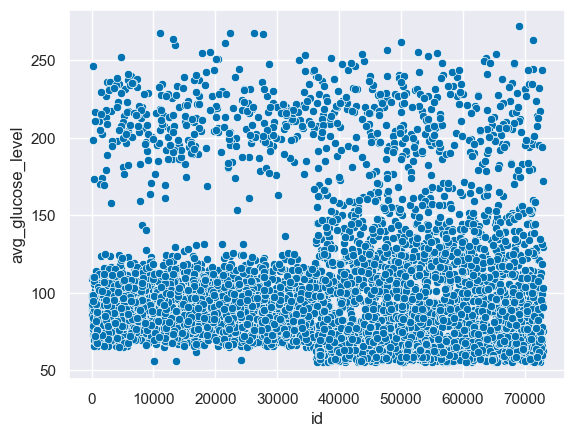

In [239]:
sns.scatterplot(data = df["avg_glucose_level"])


#### bmi outliers

<AxesSubplot:xlabel='id', ylabel='bmi'>

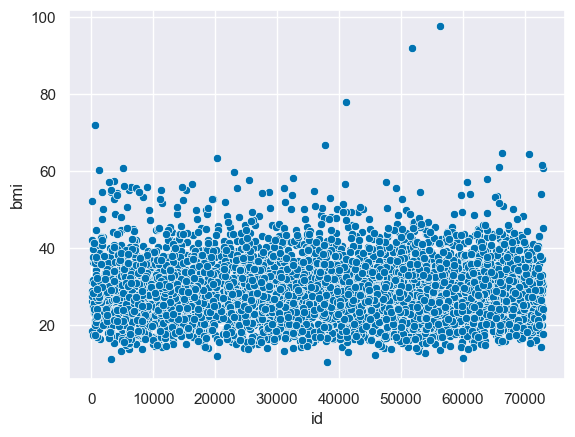

In [240]:
sns.scatterplot(data = df["bmi"])

### Handling Categorical Data

In [241]:
for col in df.columns:
        print(col, ": ", len(df[col].unique()), "labels")


gender :  2 labels
age :  104 labels
hypertension :  2 labels
heart_disease :  2 labels
ever_married :  2 labels
work_type :  5 labels
Residence_type :  2 labels
avg_glucose_level :  3978 labels
bmi :  419 labels
smoking_status :  4 labels
stroke :  2 labels



#### Label Encoding


In [242]:
label_encoder = LabelEncoder()

In [243]:
df["gender"] = label_encoder.fit_transform(df["gender"])

In [244]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046        1  67.0             0              1          Yes        Private   
51676       0  61.0             0              0          Yes  Self-employed   
31112       1  80.0             0              1          Yes        Private   
60182       0  49.0             0              0          Yes        Private   
1665        0  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234       0  80.0             1              0          Yes        Private   
44873       0  81.0             0              0          Yes  Self-employed   
19723       0  35.0             0              0          Yes  Self-employed   
37544       1  51.0             0              0          Yes        Private   
44679       0  44.0             0              0          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
18234          Urban              83.75   NaN     never smoked       0  
44873          Urban             125.20  40.0     never smoked       0  
19723          Rural              82.99  30.6     never smoked       0  
37544          Rural             166.29  25.6  formerly smoked       0  
44679          Urban              85.28  26.2          Unknown       0  

[5109 rows x 11 columns]

**1 indicates Male and 0 indicates Female**

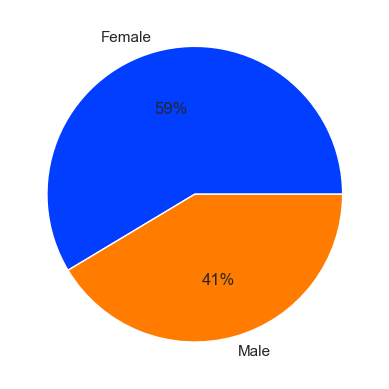

In [245]:
palette_color = sns.color_palette('bright') 
plt.pie(gender_counts, labels=["Female", "Male"] ,colors=palette_color, autopct='%.0f%%');

In [246]:
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])

In [247]:
df

gender   age  hypertension  heart_disease  ever_married      work_type  \
id                                                                              
9046        1  67.0             0              1             1        Private   
51676       0  61.0             0              0             1  Self-employed   
31112       1  80.0             0              1             1        Private   
60182       0  49.0             0              0             1        Private   
1665        0  79.0             1              0             1  Self-employed   
...       ...   ...           ...            ...           ...            ...   
18234       0  80.0             1              0             1        Private   
44873       0  81.0             0              0             1  Self-employed   
19723       0  35.0             0              0             1  Self-employed   
37544       1  51.0             0              0             1        Private   
44679       0  44.0             0              0             1       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
18234          Urban              83.75   NaN     never smoked       0  
44873          Urban             125.20  40.0     never smoked       0  
19723          Rural              82.99  30.6     never smoked       0  
37544          Rural             166.29  25.6  formerly smoked       0  
44679          Urban              85.28  26.2          Unknown       0  

[5109 rows x 11 columns]

**1 indicates married and 0 indicates Not married**

In [248]:
marriage_count = df["ever_married"].value_counts()

In [249]:
marriage_count

1    3353
0    1756
Name: ever_married, dtype: int64

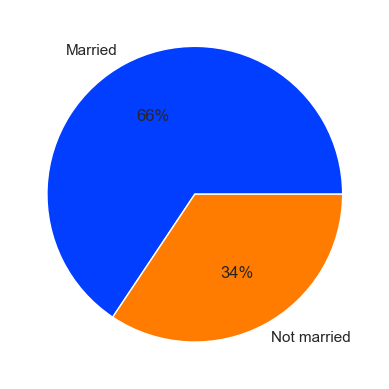

In [250]:
palette_color = sns.color_palette('bright') 
plt.pie(marriage_count, labels=["Married", "Not married"] ,colors=palette_color, autopct='%.0f%%');

In [251]:
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])

In [252]:
df 

gender   age  hypertension  heart_disease  ever_married      work_type  \
id                                                                              
9046        1  67.0             0              1             1        Private   
51676       0  61.0             0              0             1  Self-employed   
31112       1  80.0             0              1             1        Private   
60182       0  49.0             0              0             1        Private   
1665        0  79.0             1              0             1  Self-employed   
...       ...   ...           ...            ...           ...            ...   
18234       0  80.0             1              0             1        Private   
44873       0  81.0             0              0             1  Self-employed   
19723       0  35.0             0              0             1  Self-employed   
37544       1  51.0             0              0             1        Private   
44679       0  44.0             0              0             1       Govt_job   

       Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                       
9046                1             228.69  36.6  formerly smoked       1  
51676               0             202.21   NaN     never smoked       1  
31112               0             105.92  32.5     never smoked       1  
60182               1             171.23  34.4           smokes       1  
1665                0             174.12  24.0     never smoked       1  
...               ...                ...   ...              ...     ...  
18234               1              83.75   NaN     never smoked       0  
44873               1             125.20  40.0     never smoked       0  
19723               0              82.99  30.6     never smoked       0  
37544               0             166.29  25.6  formerly smoked       0  
44679               1              85.28  26.2          Unknown       0  

[5109 rows x 11 columns]

**1 indicates Urban and 0 indicates Rural**

In [253]:
Residence_type = df["Residence_type"].value_counts()

In [254]:
Residence_type

1    2596
0    2513
Name: Residence_type, dtype: int64

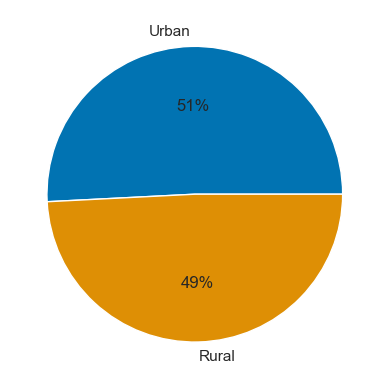

In [255]:
plt.pie(Residence_type, labels=["Urban", "Rural"], autopct='%.0f%%');

In [256]:
smoking_status = df["smoking_status"].value_counts()

In [257]:
smoking_status

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<BarContainer object of 4 artists>

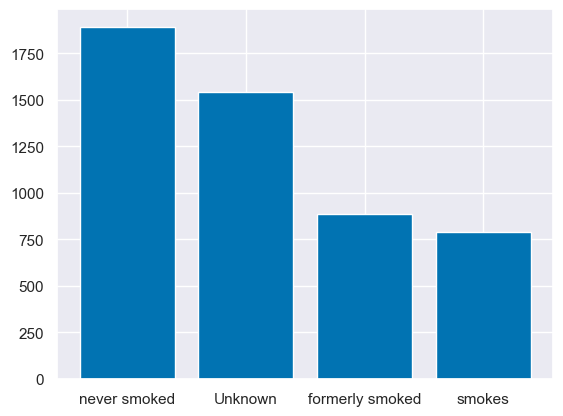

In [258]:
plt.bar(smoking_status.index, smoking_status.values)

In [259]:
category_mapping = {
    'Unknown': '0',
    'never smoked': '1',
    'formerly smoked': '2',
    'smokes': '3'
}
df['smoking_status'] = df['smoking_status'].map(category_mapping)


In [260]:
df

gender   age  hypertension  heart_disease  ever_married      work_type  \
id                                                                              
9046        1  67.0             0              1             1        Private   
51676       0  61.0             0              0             1  Self-employed   
31112       1  80.0             0              1             1        Private   
60182       0  49.0             0              0             1        Private   
1665        0  79.0             1              0             1  Self-employed   
...       ...   ...           ...            ...           ...            ...   
18234       0  80.0             1              0             1        Private   
44873       0  81.0             0              0             1  Self-employed   
19723       0  35.0             0              0             1  Self-employed   
37544       1  51.0             0              0             1        Private   
44679       0  44.0             0              0             1       Govt_job   

       Residence_type  avg_glucose_level   bmi smoking_status  stroke  
id                                                                     
9046                1             228.69  36.6              2       1  
51676               0             202.21   NaN              1       1  
31112               0             105.92  32.5              1       1  
60182               1             171.23  34.4              3       1  
1665                0             174.12  24.0              1       1  
...               ...                ...   ...            ...     ...  
18234               1              83.75   NaN              1       0  
44873               1             125.20  40.0              1       0  
19723               0              82.99  30.6              1       0  
37544               0             166.29  25.6              2       0  
44679               1              85.28  26.2              0       0  

[5109 rows x 11 columns]

#### One-Hot Encoding

lets start with encoding the work type

In [261]:
work_type = df["work_type"].value_counts()

In [262]:
work_type

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<BarContainer object of 5 artists>

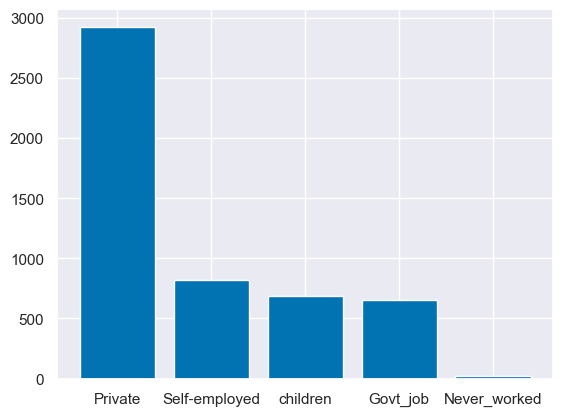

In [263]:
plt.bar(work_type.index, work_type.values)


In [264]:
work_dummies = pd.get_dummies(df["work_type"])

In [265]:
df = pd.concat([df,work_dummies],axis = 1)

In [266]:
df

gender   age  hypertension  heart_disease  ever_married      work_type  \
id                                                                              
9046        1  67.0             0              1             1        Private   
51676       0  61.0             0              0             1  Self-employed   
31112       1  80.0             0              1             1        Private   
60182       0  49.0             0              0             1        Private   
1665        0  79.0             1              0             1  Self-employed   
...       ...   ...           ...            ...           ...            ...   
18234       0  80.0             1              0             1        Private   
44873       0  81.0             0              0             1  Self-employed   
19723       0  35.0             0              0             1  Self-employed   
37544       1  51.0             0              0             1        Private   
44679       0  44.0             0              0             1       Govt_job   

       Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
id                                                                      
9046                1             228.69  36.6              2       1   
51676               0             202.21   NaN              1       1   
31112               0             105.92  32.5              1       1   
60182               1             171.23  34.4              3       1   
1665                0             174.12  24.0              1       1   
...               ...                ...   ...            ...     ...   
18234               1              83.75   NaN              1       0   
44873               1             125.20  40.0              1       0   
19723               0              82.99  30.6              1       0   
37544               0             166.29  25.6              2       0   
44679               1              85.28  26.2              0       0   

       Govt_job  Never_worked  Private  Self-employed  children  
id                                                               
9046          0             0        1              0         0  
51676         0             0        0              1         0  
31112         0             0        1              0         0  
60182         0             0        1              0         0  
1665          0             0        0              1         0  
...         ...           ...      ...            ...       ...  
18234         0             0        1              0         0  
44873         0             0        0              1         0  
19723         0             0        0              1         0  
37544         0             0        1              0         0  
44679         1             0        0              0         0  

[5109 rows x 16 columns]

In [267]:
df = df.drop(columns=["work_type"])


one dummy variable must be omitted to avoid perfect multicollinearity.

In [268]:
df = df.drop(columns=["Never_worked"])


In [269]:
df

gender   age  hypertension  heart_disease  ever_married  \
id                                                               
9046        1  67.0             0              1             1   
51676       0  61.0             0              0             1   
31112       1  80.0             0              1             1   
60182       0  49.0             0              0             1   
1665        0  79.0             1              0             1   
...       ...   ...           ...            ...           ...   
18234       0  80.0             1              0             1   
44873       0  81.0             0              0             1   
19723       0  35.0             0              0             1   
37544       1  51.0             0              0             1   
44679       0  44.0             0              0             1   

       Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
id                                                                      
9046                1             228.69  36.6              2       1   
51676               0             202.21   NaN              1       1   
31112               0             105.92  32.5              1       1   
60182               1             171.23  34.4              3       1   
1665                0             174.12  24.0              1       1   
...               ...                ...   ...            ...     ...   
18234               1              83.75   NaN              1       0   
44873               1             125.20  40.0              1       0   
19723               0              82.99  30.6              1       0   
37544               0             166.29  25.6              2       0   
44679               1              85.28  26.2              0       0   

       Govt_job  Private  Self-employed  children  
id                                                 
9046          0        1              0         0  
51676         0        0              1         0  
31112         0        1              0         0  
60182         0        1              0         0  
1665          0        0              1         0  
...         ...      ...            ...       ...  
18234         0        1              0         0  
44873         0        0              1         0  
19723         0        0              1         0  
37544         0        1              0         0  
44679         1        0              0         0  

[5109 rows x 14 columns]

### Handling Missing Data

In [270]:
df.isna()

gender    age  hypertension  heart_disease  ever_married  \
id                                                                
9046    False  False         False          False         False   
51676   False  False         False          False         False   
31112   False  False         False          False         False   
60182   False  False         False          False         False   
1665    False  False         False          False         False   
...       ...    ...           ...            ...           ...   
18234   False  False         False          False         False   
44873   False  False         False          False         False   
19723   False  False         False          False         False   
37544   False  False         False          False         False   
44679   False  False         False          False         False   

       Residence_type  avg_glucose_level    bmi  smoking_status  stroke  \
id                                                                        
9046            False              False  False           False   False   
51676           False              False   True           False   False   
31112           False              False  False           False   False   
60182           False              False  False           False   False   
1665            False              False  False           False   False   
...               ...                ...    ...             ...     ...   
18234           False              False   True           False   False   
44873           False              False  False           False   False   
19723           False              False  False           False   False   
37544           False              False  False           False   False   
44679           False              False  False           False   False   

       Govt_job  Private  Self-employed  children  
id                                                 
9046      False    False          False     False  
51676     False    False          False     False  
31112     False    False          False     False  
60182     False    False          False     False  
1665      False    False          False     False  
...         ...      ...            ...       ...  
18234     False    False          False     False  
44873     False    False          False     False  
19723     False    False          False     False  
37544     False    False          False     False  
44679     False    False          False     False  

[5109 rows x 14 columns]

In [271]:
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
Govt_job             False
Private              False
Self-employed        False
children             False
dtype: bool

In [272]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Govt_job               0
Private                0
Self-employed          0
children               0
dtype: int64

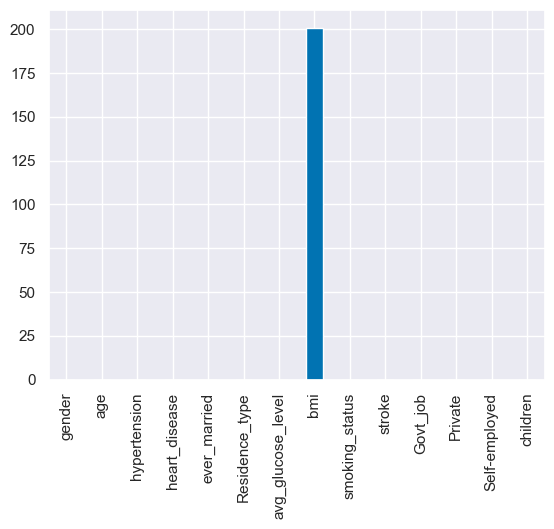

In [273]:
df.isna().sum().plot(kind="bar")
plt.show()

We can see that there is missing data in the bmi parameter. Here We are going to fill these missing values.



Due to the difference in the calculation of BMI for children and teens compared to adults, it’s better to first group the dataset based on age and then use the mean of each group to fill the missing values.

Let’s check the maximum and minimum ages first.



In [274]:
df["age"].min()

0.08

In [275]:
df["age"].max()

82.0

In [276]:
df.groupby(["age"]).mean()

gender  hypertension  heart_disease  ever_married  Residence_type  \
age                                                                          
0.08   0.500000      0.000000       0.000000      0.000000        0.500000   
0.16   1.000000      0.000000       0.000000      0.000000        0.666667   
0.24   1.000000      0.000000       0.000000      0.000000        0.600000   
0.32   0.400000      0.000000       0.000000      0.000000        0.600000   
0.40   0.500000      0.000000       0.000000      0.000000        0.500000   
...         ...           ...            ...           ...             ...   
78.00  0.411765      0.235294       0.196078      0.872549        0.588235   
79.00  0.305882      0.200000       0.223529      0.847059        0.541176   
80.00  0.400000      0.300000       0.242857      0.900000        0.542857   
81.00  0.366667      0.266667       0.216667      0.866667        0.533333   
82.00  0.410714      0.232143       0.250000      0.857143        0.589286   

       avg_glucose_level        bmi    stroke  Govt_job   Private  \
age                                                                 
0.08          105.000000  15.500000  0.000000  0.000000  0.000000   
0.16           98.006667  14.766667  0.000000  0.000000  0.000000   
0.24           94.112000  17.400000  0.000000  0.000000  0.000000   
0.32           91.004000  18.080000  0.000000  0.000000  0.000000   
0.40           97.605000  15.850000  0.000000  0.000000  0.000000   
...                  ...        ...       ...       ...       ...   
78.00         119.664216  27.929032  0.205882  0.078431  0.500000   
79.00         113.806824  27.862338  0.200000  0.117647  0.447059   
80.00         119.772857  28.783582  0.242857  0.071429  0.471429   
81.00         117.180167  27.951667  0.233333  0.083333  0.450000   
82.00         130.483571  28.029091  0.160714  0.071429  0.464286   

       Self-employed  children  
age                             
0.08        0.000000       1.0  
0.16        0.000000       1.0  
0.24        0.000000       1.0  
0.32        0.000000       1.0  
0.40        0.000000       1.0  
...              ...       ...  
78.00       0.421569       0.0  
79.00       0.435294       0.0  
80.00       0.457143       0.0  
81.00       0.466667       0.0  
82.00       0.464286       0.0  

[104 rows x 12 columns]

To group the data by age and fill the missing BMI data with each group’s BMI mean, the following age groups are considered, which are commonly used in medical and health research:

- **Infants and Toddlers**: 0 - 2 years
- **Children**: 3 - 12 years
- **Adolescents**: 13 - 18 years
- **Young Adults**: 19 - 35 years
- **Middle-Aged Adults**: 36 - 55 years
- **Older Adults**: 56 - 75 years
- **Elderly**: 76+ years

These groups are designed to reflect different stages of growth and development, which can influence BMI. By using these age groups, we can calculate the mean BMI for each group and then fill in the missing BMI values accordingly.


I decided to add the age groups as a column and encode them from one to six so we could have different age groups as a new feature!

In [277]:
age_groups = [
    (0,2, 0),
    (3, 12, 1),
    (13, 18, 2),
    (19, 35, 3),
    (36, 55, 4),
    (56, 75, 5),
    (76, np.inf, 6)
]

In [278]:
def assign_age_group(age):
    if pd.isna(age):
        return np.nan
    for lower, upper, group in age_groups:
        if lower <= age <= upper:
            return group
    return np.nan

In [279]:
df["Age Group"] = df["age"].apply(assign_age_group)

In [280]:
df

gender   age  hypertension  heart_disease  ever_married  \
id                                                               
9046        1  67.0             0              1             1   
51676       0  61.0             0              0             1   
31112       1  80.0             0              1             1   
60182       0  49.0             0              0             1   
1665        0  79.0             1              0             1   
...       ...   ...           ...            ...           ...   
18234       0  80.0             1              0             1   
44873       0  81.0             0              0             1   
19723       0  35.0             0              0             1   
37544       1  51.0             0              0             1   
44679       0  44.0             0              0             1   

       Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
id                                                                      
9046                1             228.69  36.6              2       1   
51676               0             202.21   NaN              1       1   
31112               0             105.92  32.5              1       1   
60182               1             171.23  34.4              3       1   
1665                0             174.12  24.0              1       1   
...               ...                ...   ...            ...     ...   
18234               1              83.75   NaN              1       0   
44873               1             125.20  40.0              1       0   
19723               0              82.99  30.6              1       0   
37544               0             166.29  25.6              2       0   
44679               1              85.28  26.2              0       0   

       Govt_job  Private  Self-employed  children  Age Group  
id                                                            
9046          0        1              0         0          5  
51676         0        0              1         0          5  
31112         0        1              0         0          6  
60182         0        1              0         0          4  
1665          0        0              1         0          6  
...         ...      ...            ...       ...        ...  
18234         0        1              0         0          6  
44873         0        0              1         0          6  
19723         0        0              1         0          3  
37544         0        1              0         0          4  
44679         1        0              0         0          4  

[5109 rows x 15 columns]

now the age groups are set! lets fill the missing data:

To make the imputed values more varied and realistic, we atre going to can add some randomness around the mean. One way to do this is by using a normal distribution centered around the mean with a small standard deviation.

In [281]:
def fill_bmi(group):
    mean_bmi = group["bmi"].mean()
    std_bmi = group["bmi"].std()
    group["bmi"] = group["bmi"].apply(lambda x: np.random.normal(mean_bmi, std_bmi) if pd.isna(x) else x)
    return group

In [282]:
df = df.groupby("Age Group").apply(fill_bmi)

In [283]:
df

gender   age  hypertension  heart_disease  ever_married  \
id                                                               
9046        1  67.0             0              1             1   
51676       0  61.0             0              0             1   
31112       1  80.0             0              1             1   
60182       0  49.0             0              0             1   
1665        0  79.0             1              0             1   
...       ...   ...           ...            ...           ...   
18234       0  80.0             1              0             1   
44873       0  81.0             0              0             1   
19723       0  35.0             0              0             1   
37544       1  51.0             0              0             1   
44679       0  44.0             0              0             1   

       Residence_type  avg_glucose_level        bmi smoking_status  stroke  \
id                                                                           
9046                1             228.69  36.600000              2       1   
51676               0             202.21  34.361054              1       1   
31112               0             105.92  32.500000              1       1   
60182               1             171.23  34.400000              3       1   
1665                0             174.12  24.000000              1       1   
...               ...                ...        ...            ...     ...   
18234               1              83.75  19.942258              1       0   
44873               1             125.20  40.000000              1       0   
19723               0              82.99  30.600000              1       0   
37544               0             166.29  25.600000              2       0   
44679               1              85.28  26.200000              0       0   

       Govt_job  Private  Self-employed  children  Age Group  
id                                                            
9046          0        1              0         0          5  
51676         0        0              1         0          5  
31112         0        1              0         0          6  
60182         0        1              0         0          4  
1665          0        0              1         0          6  
...         ...      ...            ...       ...        ...  
18234         0        1              0         0          6  
44873         0        0              1         0          6  
19723         0        0              1         0          3  
37544         0        1              0         0          4  
44679         1        0              0         0          4  

[5109 rows x 15 columns]

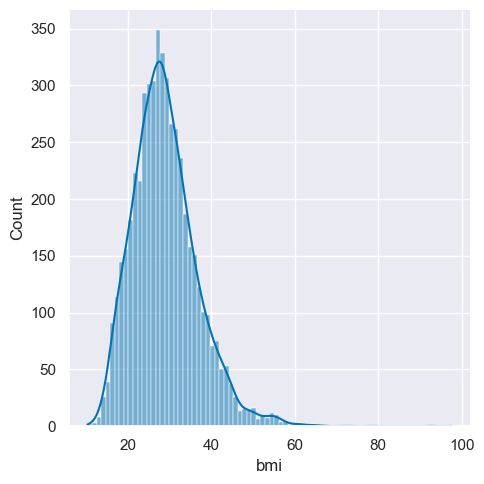

In [284]:
sns.displot(df["bmi"], kde=True)

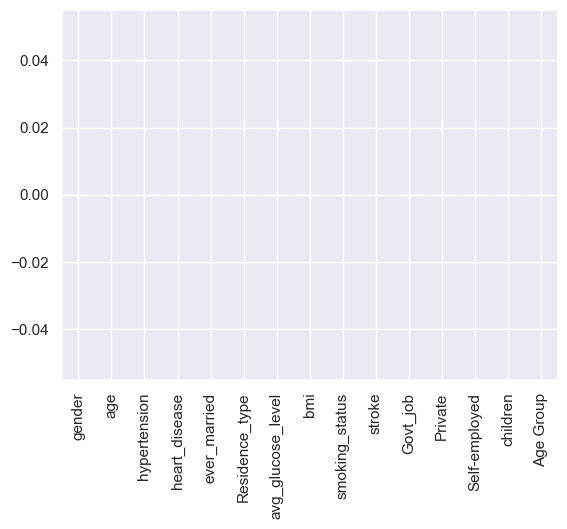

In [285]:
df.isna().sum().plot(kind="bar")
plt.show()

We can see that there is no missing data left so we can go to the next step. 

### Feature engineering and feature creation

#### Avg Glucose Level

In [286]:
df["avg_glucose_level"].min()

55.12

In [287]:
df["avg_glucose_level"].max()

271.74

- **Low**: 55 - 99 (Normal fasting glucose level)
- **Normal**: 100 - 125 (Prediabetes range)
- **High**: 126 - 199 (Diabetes range)
- **Very High**: 200 - 271 (Severe hyperglycemia)

These categories align with standard medical definitions for blood glucose levels, making them meaningful for analysis, especially in health-related datasets.

In [288]:
glucose_groups = [
    (0, 99, 0),
    (99, 125, 1),
    (125, 199, 2),
    (199, np.inf, 3)
]

In [289]:
def assign_glucose_group(avg_glucose_level):
    if pd.isna (avg_glucose_level):
        return np.nan
    for lower, upper, group in glucose_groups:
        if lower <= avg_glucose_level <= upper:
            return group


In [290]:
df["Glucose Group"] = df["avg_glucose_level"].apply(assign_glucose_group)

In [291]:
df

gender   age  hypertension  heart_disease  ever_married  \
id                                                               
9046        1  67.0             0              1             1   
51676       0  61.0             0              0             1   
31112       1  80.0             0              1             1   
60182       0  49.0             0              0             1   
1665        0  79.0             1              0             1   
...       ...   ...           ...            ...           ...   
18234       0  80.0             1              0             1   
44873       0  81.0             0              0             1   
19723       0  35.0             0              0             1   
37544       1  51.0             0              0             1   
44679       0  44.0             0              0             1   

       Residence_type  avg_glucose_level        bmi smoking_status  stroke  \
id                                                                           
9046                1             228.69  36.600000              2       1   
51676               0             202.21  34.361054              1       1   
31112               0             105.92  32.500000              1       1   
60182               1             171.23  34.400000              3       1   
1665                0             174.12  24.000000              1       1   
...               ...                ...        ...            ...     ...   
18234               1              83.75  19.942258              1       0   
44873               1             125.20  40.000000              1       0   
19723               0              82.99  30.600000              1       0   
37544               0             166.29  25.600000              2       0   
44679               1              85.28  26.200000              0       0   

       Govt_job  Private  Self-employed  children  Age Group  Glucose Group  
id                                                                           
9046          0        1              0         0          5              3  
51676         0        0              1         0          5              3  
31112         0        1              0         0          6              1  
60182         0        1              0         0          4              2  
1665          0        0              1         0          6              2  
...         ...      ...            ...       ...        ...            ...  
18234         0        1              0         0          6              0  
44873         0        0              1         0          6              2  
19723         0        0              1         0          3              0  
37544         0        1              0         0          4              2  
44679         1        0              0         0          4              0  

[5109 rows x 16 columns]

In [292]:
df["Glucose Group"].isna().sum()

0

#### BMI

In [293]:
df["bmi"].min()

10.3


- **Underweight**: 10 - 18.4
- **Normal weight**: 18.5 - 24.9
- **Overweight**: 25 - 29.9
- **Obese Class I**: 30 - 34.9
- **Obese Class II**: 35 - 39.9
- **Obese Class III**: 40 - 97

These categories are widely recognized and used in medical and health research, providing a standardized way to interpret BMI values.

In [294]:
BMI_groups = [
    (9, 18.4, 0),
    (18.4, 24.9, 1),
    (24.9, 29.9, 2),
    (29.9, 34.9, 3),
    (34.9, 39.9, 4),
    (39.9, np.inf, 5)
]

In [295]:
def assign_bmi_group(bmi):
    if pd.isna(bmi):
        return np.nan
    for lower, upper , group in BMI_groups:
        if lower <= bmi <= upper:
            return group
    return np.nan

In [296]:
df["BMI Group"] = df["bmi"].apply(assign_bmi_group)

In [297]:
df

gender   age  hypertension  heart_disease  ever_married  \
id                                                               
9046        1  67.0             0              1             1   
51676       0  61.0             0              0             1   
31112       1  80.0             0              1             1   
60182       0  49.0             0              0             1   
1665        0  79.0             1              0             1   
...       ...   ...           ...            ...           ...   
18234       0  80.0             1              0             1   
44873       0  81.0             0              0             1   
19723       0  35.0             0              0             1   
37544       1  51.0             0              0             1   
44679       0  44.0             0              0             1   

       Residence_type  avg_glucose_level        bmi smoking_status  stroke  \
id                                                                           
9046                1             228.69  36.600000              2       1   
51676               0             202.21  34.361054              1       1   
31112               0             105.92  32.500000              1       1   
60182               1             171.23  34.400000              3       1   
1665                0             174.12  24.000000              1       1   
...               ...                ...        ...            ...     ...   
18234               1              83.75  19.942258              1       0   
44873               1             125.20  40.000000              1       0   
19723               0              82.99  30.600000              1       0   
37544               0             166.29  25.600000              2       0   
44679               1              85.28  26.200000              0       0   

       Govt_job  Private  Self-employed  children  Age Group  Glucose Group  \
id                                                                            
9046          0        1              0         0          5              3   
51676         0        0              1         0          5              3   
31112         0        1              0         0          6              1   
60182         0        1              0         0          4              2   
1665          0        0              1         0          6              2   
...         ...      ...            ...       ...        ...            ...   
18234         0        1              0         0          6              0   
44873         0        0              1         0          6              2   
19723         0        0              1         0          3              0   
37544         0        1              0         0          4              2   
44679         1        0              0         0          4              0   

       BMI Group  
id                
9046           4  
51676          3  
31112          3  
60182          3  
1665           1  
...          ...  
18234          1  
44873          5  
19723          3  
37544          2  
44679          2  

[5109 rows x 17 columns]

In [298]:
df["BMI Group"].isna().sum()

0

### Data Normalization and Scaling

In [299]:
scaler = StandardScaler()

In [300]:
df


gender   age  hypertension  heart_disease  ever_married  \
id                                                               
9046        1  67.0             0              1             1   
51676       0  61.0             0              0             1   
31112       1  80.0             0              1             1   
60182       0  49.0             0              0             1   
1665        0  79.0             1              0             1   
...       ...   ...           ...            ...           ...   
18234       0  80.0             1              0             1   
44873       0  81.0             0              0             1   
19723       0  35.0             0              0             1   
37544       1  51.0             0              0             1   
44679       0  44.0             0              0             1   

       Residence_type  avg_glucose_level        bmi smoking_status  stroke  \
id                                                                           
9046                1             228.69  36.600000              2       1   
51676               0             202.21  34.361054              1       1   
31112               0             105.92  32.500000              1       1   
60182               1             171.23  34.400000              3       1   
1665                0             174.12  24.000000              1       1   
...               ...                ...        ...            ...     ...   
18234               1              83.75  19.942258              1       0   
44873               1             125.20  40.000000              1       0   
19723               0              82.99  30.600000              1       0   
37544               0             166.29  25.600000              2       0   
44679               1              85.28  26.200000              0       0   

       Govt_job  Private  Self-employed  children  Age Group  Glucose Group  \
id                                                                            
9046          0        1              0         0          5              3   
51676         0        0              1         0          5              3   
31112         0        1              0         0          6              1   
60182         0        1              0         0          4              2   
1665          0        0              1         0          6              2   
...         ...      ...            ...       ...        ...            ...   
18234         0        1              0         0          6              0   
44873         0        0              1         0          6              2   
19723         0        0              1         0          3              0   
37544         0        1              0         0          4              2   
44679         1        0              0         0          4              0   

       BMI Group  
id                
9046           4  
51676          3  
31112          3  
60182          3  
1665           1  
...          ...  
18234          1  
44873          5  
19723          3  
37544          2  
44679          2  

[5109 rows x 17 columns]

In [301]:
df_excluded = df[[
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "Residence_type",
    "stroke",
    "Govt_job",
    "Private",
    "Self-employed",
    "children",
    "smoking_status",
    "Age Group",
    "BMI Group",
    "Glucose Group"]]




In [302]:
df_excluded

gender  hypertension  heart_disease  ever_married  Residence_type  \
id                                                                         
9046        1             0              1             1               1   
51676       0             0              0             1               0   
31112       1             0              1             1               0   
60182       0             0              0             1               1   
1665        0             1              0             1               0   
...       ...           ...            ...           ...             ...   
18234       0             1              0             1               1   
44873       0             0              0             1               1   
19723       0             0              0             1               0   
37544       1             0              0             1               0   
44679       0             0              0             1               1   

       stroke  Govt_job  Private  Self-employed  children smoking_status  \
id                                                                         
9046        1         0        1              0         0              2   
51676       1         0        0              1         0              1   
31112       1         0        1              0         0              1   
60182       1         0        1              0         0              3   
1665        1         0        0              1         0              1   
...       ...       ...      ...            ...       ...            ...   
18234       0         0        1              0         0              1   
44873       0         0        0              1         0              1   
19723       0         0        0              1         0              1   
37544       0         0        1              0         0              2   
44679       0         1        0              0         0              0   

       Age Group  BMI Group  Glucose Group  
id                                          
9046           5          4              3  
51676          5          3              3  
31112          6          3              1  
60182          4          3              2  
1665           6          1              2  
...          ...        ...            ...  
18234          6          1              0  
44873          6          5              2  
19723          3          3              0  
37544          4          2              2  
44679          4          2              0  

[5109 rows x 14 columns]

In [303]:
df_to_normalize = df.drop(columns=[
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "Residence_type",
    "stroke",
    "Govt_job",
    "Private",
    "Self-employed",
    "children",
    "smoking_status",
    "Age Group",
    "BMI Group",
    "Glucose Group"
    ])


In [304]:

df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)


In [305]:
df_normalized

age  avg_glucose_level       bmi
0     1.051242           2.706450  0.980216
1     0.785889           2.121652  0.694141
2     1.626174          -0.004867  0.456350
3     0.255182           1.437473  0.699117
4     1.581949           1.501297 -0.629713
...        ...                ...       ...
5104  1.626174          -0.494481 -1.148179
5105  1.670400           0.420922  1.414641
5106 -0.363976          -0.511266  0.213583
5107  0.343633           1.328375 -0.425277
5108  0.034054          -0.460692 -0.348614

[5109 rows x 3 columns]

In [306]:
df_excluded = df_excluded.set_index(df_normalized.index)
df_final = pd.concat([df_normalized, df_excluded], axis=1)

In [307]:
df = df_final

In [308]:
df

age  avg_glucose_level       bmi  gender  hypertension  \
0     1.051242           2.706450  0.980216       1             0   
1     0.785889           2.121652  0.694141       0             0   
2     1.626174          -0.004867  0.456350       1             0   
3     0.255182           1.437473  0.699117       0             0   
4     1.581949           1.501297 -0.629713       0             1   
...        ...                ...       ...     ...           ...   
5104  1.626174          -0.494481 -1.148179       0             1   
5105  1.670400           0.420922  1.414641       0             0   
5106 -0.363976          -0.511266  0.213583       0             0   
5107  0.343633           1.328375 -0.425277       1             0   
5108  0.034054          -0.460692 -0.348614       0             0   

      heart_disease  ever_married  Residence_type  stroke  Govt_job  Private  \
0                 1             1               1       1         0        1   
1                 0             1               0       1         0        0   
2                 1             1               0       1         0        1   
3                 0             1               1       1         0        1   
4                 0             1               0       1         0        0   
...             ...           ...             ...     ...       ...      ...   
5104              0             1               1       0         0        1   
5105              0             1               1       0         0        0   
5106              0             1               0       0         0        0   
5107              0             1               0       0         0        1   
5108              0             1               1       0         1        0   

      Self-employed  children smoking_status  Age Group  BMI Group  \
0                 0         0              2          5          4   
1                 1         0              1          5          3   
2                 0         0              1          6          3   
3                 0         0              3          4          3   
4                 1         0              1          6          1   
...             ...       ...            ...        ...        ...   
5104              0         0              1          6          1   
5105              1         0              1          6          5   
5106              1         0              1          3          3   
5107              0         0              2          4          2   
5108              0         0              0          4          2   

      Glucose Group  
0                 3  
1                 3  
2                 1  
3                 2  
4                 2  
...             ...  
5104              0  
5105              2  
5106              0  
5107              2  
5108              0  

[5109 rows x 17 columns]

## Plotting and Comparison

### heatmaps

lets select to continuous metrics to calculate the corr and create a heatmap

In [309]:
corr_matrix = df.corr()

<AxesSubplot:>

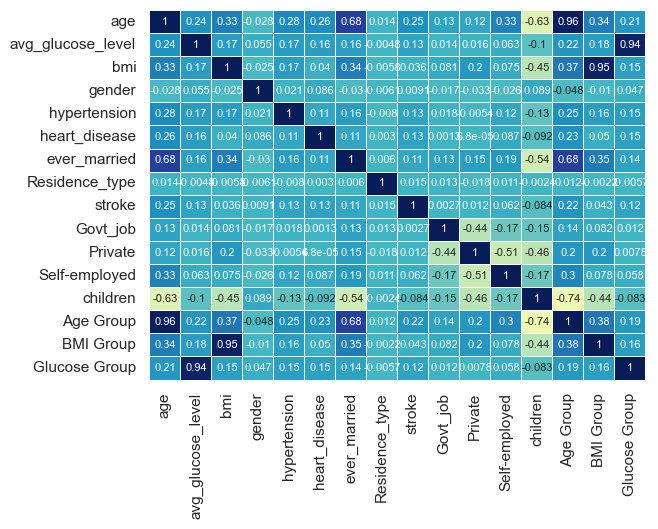

In [310]:
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", cbar=False, linewidths=.5, vmin=-1, vmax=1,  annot_kws={"size": 8})




#### Observations from the Heatmap

1. **Highest Relation:**
    - The highest relation can be observed between age and being married, which makes sense.

2. **BMI, Age, and Being Married:**
    - Another interesting relation is between BMI, age, and being married. BMI tends to increase as people get older and married, which is not ideal for health in elderly ages.

3. **Negative Correlation:**
    - The blue part of the heatmap shows a negative correlation between one-hot encoded parameters, which makes sense. A person who is in one job cannot be in another one simultaneously. There is also a negative correlation between being a child and being married and aging, which again is logical.

4. **Stroke-Related Features:**
    - The biggest correlations are for age, hypertension, heart disease, average glucose level, and being married (probably because it is highly correlated with age).Also, there is always a common possibility that the presence of two factors together would impact very much more than only one.
    
5. **Children:**
    - we can see that being a child is negetively correlated with almost all of the parametes which makes sence! we defined age as the main parameter of stroke so a less correlation should be seen in children and it is. Also many of parameters like haiving a job or being married or many health problems, are defined mostly in the adults so as we can see there is a negetive correlation between being a child and these parameters.


    


In [311]:
categorical_data = ["gender", "hypertension", "heart_disease", "ever_married", "Residence_type"]
stroke_data = df["stroke"]

In [312]:
for i in range(len(categorical_data)):
    data = df[categorical_data[i]]
    contingency_table = pd.crosstab(data, stroke_data)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    phi = np.sqrt(chi2 / contingency_table.sum().sum())
    print(f"Phi Coefficient: {phi}")





Phi Coefficient: 0.008157801373075214
Phi Coefficient: 0.12635884599246405
Phi Coefficient: 0.1328942441984636
Phi Coefficient: 0.10734232198815681
Phi Coefficient: 0.014505425904914148


### pairplots

Let’s select continuous metrics to calculate the correlation and create a heatmap.



In [313]:
df_pair = df[["age","avg_glucose_level", "bmi", "stroke"]]
# "hypertension" "heart_disease""ever_married" "Residence_type"  "smoking_status" "stroke" , "Age Group"

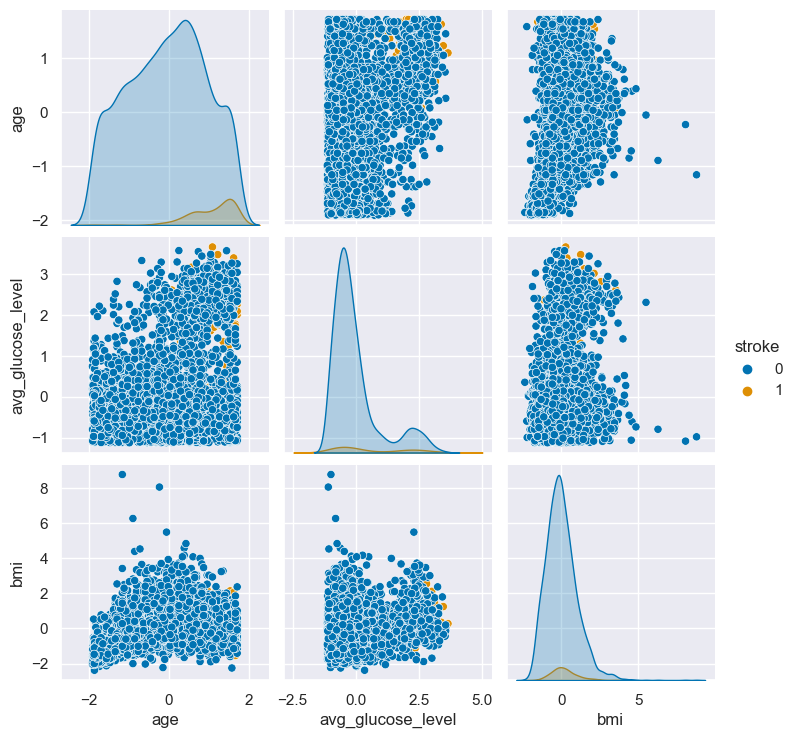

In [314]:
sns.pairplot(df_pair, hue="stroke")

we may say that average glucose level is higher among the onse who had stroke

In [315]:
df_pair = df[["age","avg_glucose_level", "bmi","smoking_status"]]
# "hypertension" "heart_disease""ever_married" "Residence_type"  "smoking_status", "stroke" , "Age Group"

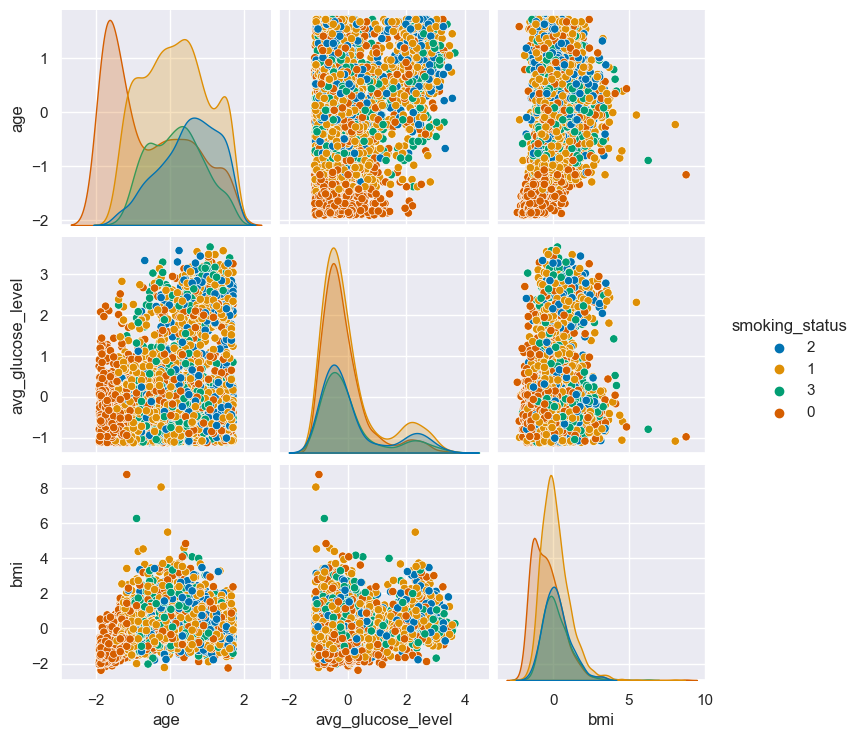

In [316]:
sns.pairplot(df_pair, hue="smoking_status")

In [317]:
df_pair = df[["age","avg_glucose_level", "bmi", "Age Group" ]]
# "hypertension" "heart_disease""ever_married" "Residence_type"  "smoking_status", "stroke" , "Age Group"

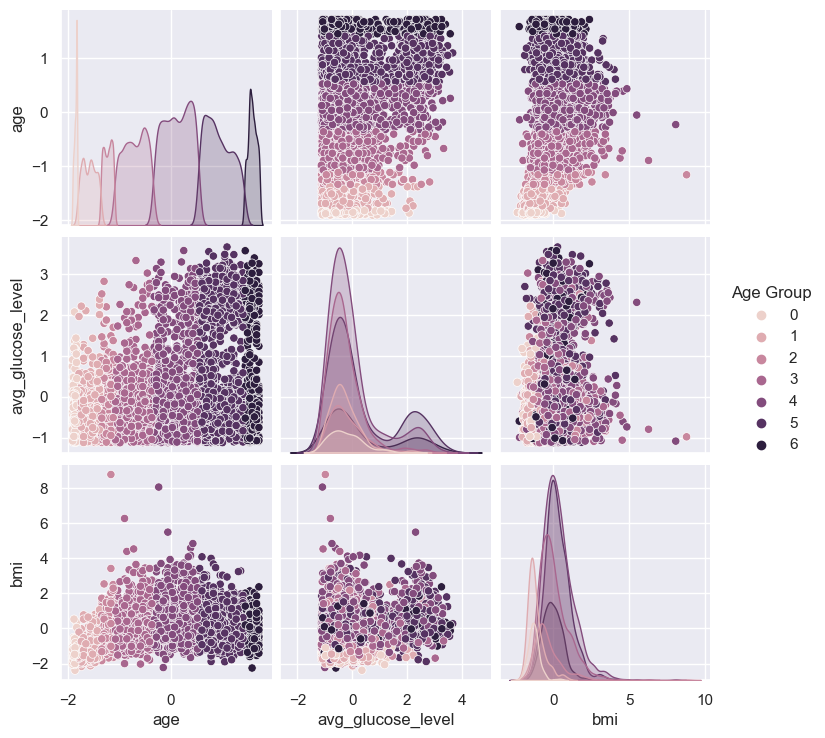

In [318]:
sns.pairplot(df_pair, hue="Age Group")

In [319]:
df_pair = df[["age","avg_glucose_level", "BMI Group" ]]
# "hypertension" "heart_disease""ever_married" "Residence_type"  "smoking_status", "stroke" , "Age Group"

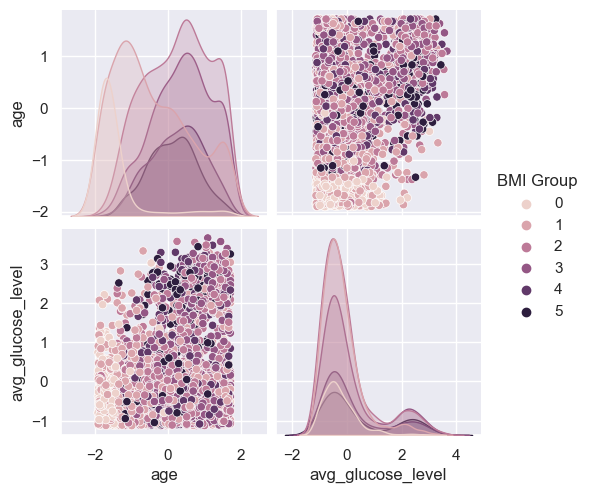

In [320]:
sns.pairplot(df_pair, hue="BMI Group")

In [321]:
df_pair = df[["age","bmi", "Glucose Group" ]]
# "hypertension" "heart_disease""ever_married" "Residence_type"  "smoking_status", "stroke" , "Age Group"

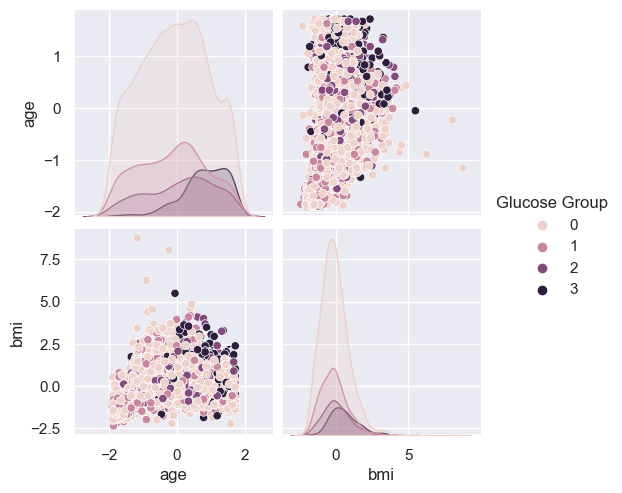

In [322]:
sns.pairplot(df_pair, hue="Glucose Group")

We can see that glucose level and glucose group increase as age increases.



Due to the low correlation of each parameter and most of the parameters being categorical, not much can be concluded from the pair plots.

### barplots

#### smoking_status

<AxesSubplot:xlabel='smoking_status,stroke'>

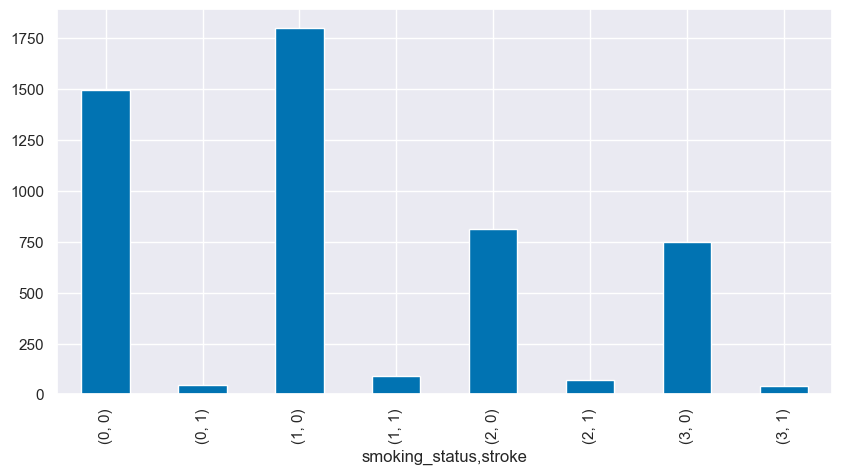

In [323]:
df_sm_gd = df.groupby("smoking_status")["stroke"].value_counts()

df_sm_gd.plot(kind = 'bar', figsize=(10,5))


Most of our data pertains to non-smokers who did not have a stroke. The second most common category in our dataset is individuals with unknown smoking status who did not have a stroke.

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

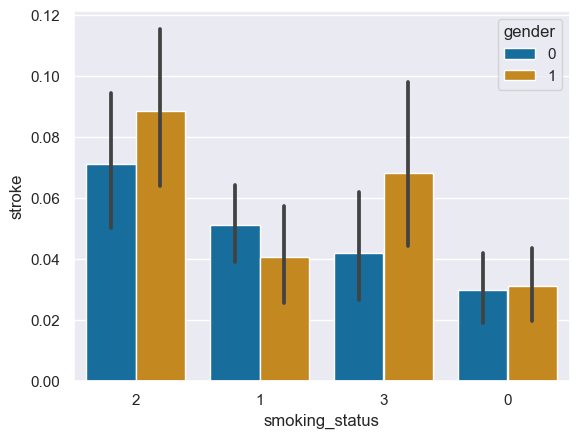

In [324]:
sns.barplot(data=df, y ="stroke", x = "smoking_status", hue= "gender" )

According to Group 3 of the chart, smoking might be a more dangerous risk factor for men compared to women. A higher risk of stroke is observed among men who smoke compared to women.

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

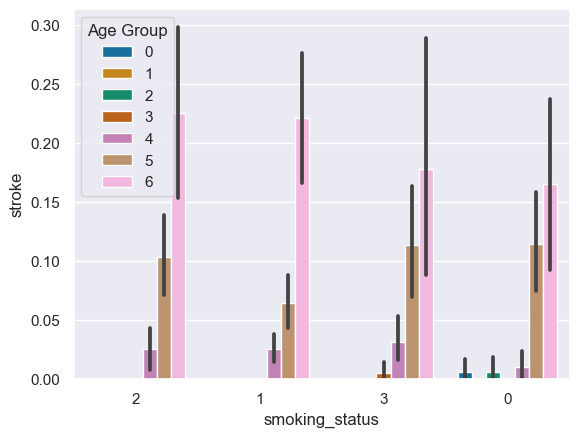

In [325]:
sns.barplot(data=df, y ="stroke", x = "smoking_status", hue= "Age Group" )

From this bar chart, we can conclude that almost all data for smokers and non-smokers comes from Groups 4, 5, and 6, which represent individuals above 36 years old. If we examine Group 3 (smokers) and Group 2 (former smokers), we see that the incidence of stroke in the fifth age group (56 to 75 years) is higher than in the non-smokers group of the same age (Group 1 among smokers). We also observe that smoking does not have much of an effect in the fourth group, suggesting that smoking is a risk factor that manifests its effects in later years, even for early smokers who quit. Therefore, smokers in the third age group are also at risk of having a stroke in later years.

<AxesSubplot:xlabel='Age Group', ylabel='stroke'>

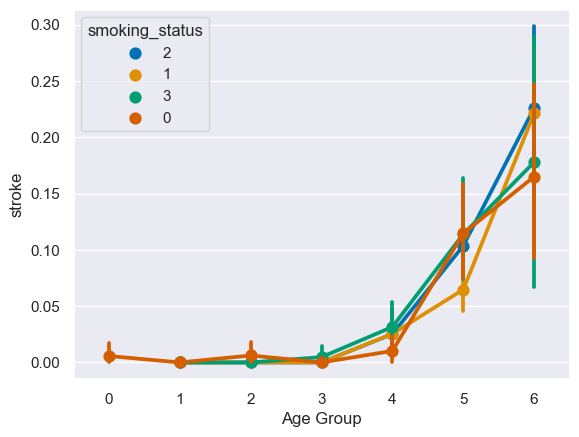

In [326]:
sns.pointplot(data = df, y = "stroke",
            x = "Age Group",
            hue = "smoking_status")

Group 0 represents unknown smoking status. In our point plot, we see that Group 0 behaves similarly to Group 3, indicating that many individuals with unknown status are probably smokers or have been smokers. A significant increase after passing age Group 4 suggests that age is the most important risk factor for stroke. We also observe a much higher stroke occurrence in smokers and former smokers compared to non-smokers in age Group 5. However, after passing age Group 5, an unexpected exponential increase is observed in non-smokers and former smokers compared to the smoker group.

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

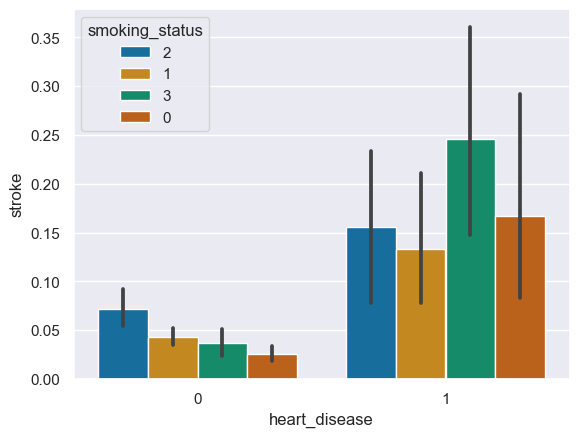

In [327]:
sns.barplot(data=df, y ="stroke", x = "heart_disease", hue= "smoking_status" )

We observe a significantly higher risk of stroke in individuals with heart disease. Additionally, people with heart disease who smoke have a higher stroke rate than non-smokers and former smokers.


<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

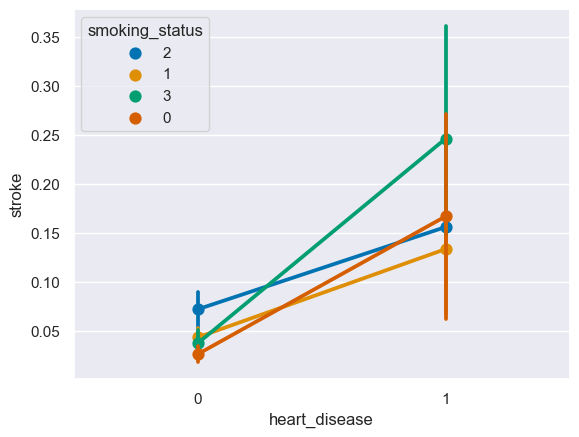

In [328]:
sns.pointplot(data=df, y="stroke",
x="heart_disease",
hue="smoking_status")

The risk of stroke has increased similarly among unknown, former smokers, and non-smokers, but the risk in the smokers group has increased much more. We also see that in people without heart disease, smoking is not a risk factor by itself. This indicates that smoking is a dangerous risk factor for stroke only when heart disease is present.

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

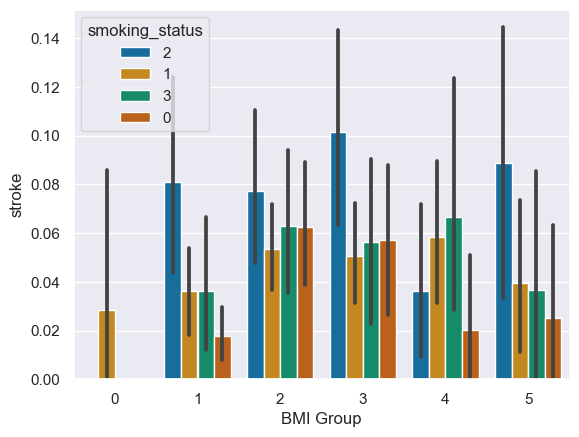

In [329]:
sns.barplot(data=df, y ="stroke", x = "BMI Group", hue= "smoking_status" )

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

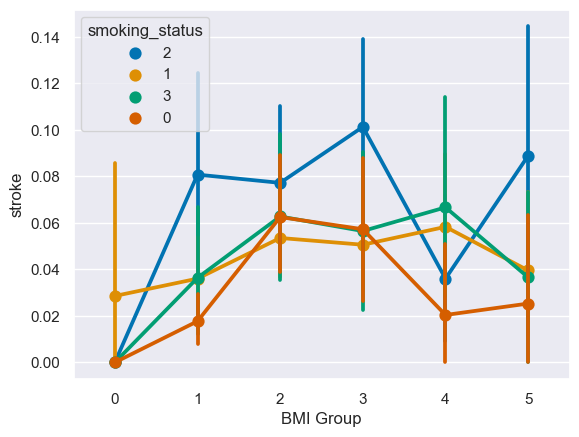

In [330]:
sns.pointplot(data=df, y="stroke",
x="BMI Group",
hue="smoking_status")

Not much can be observed from the chart regarding smoking and BMI, suggesting that these factors do not create a higher risk when present together.

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

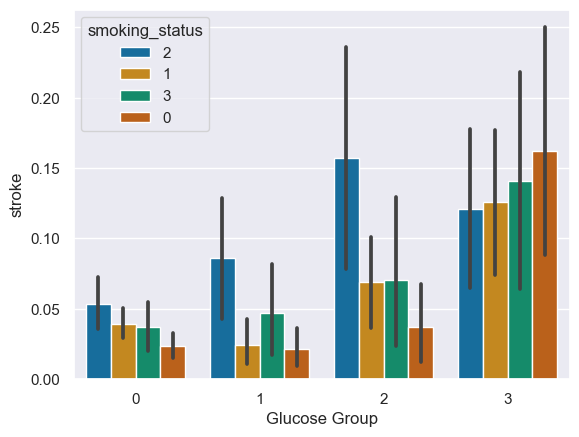

In [331]:
sns.barplot(data=df, y ="stroke", x = "Glucose Group", hue= "smoking_status" )

A significantly higher risk of stroke is indicated in individuals with high glucose levels compared to other groups. Not much correlation is seen between smoking status and glucose level as risk factors together.

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

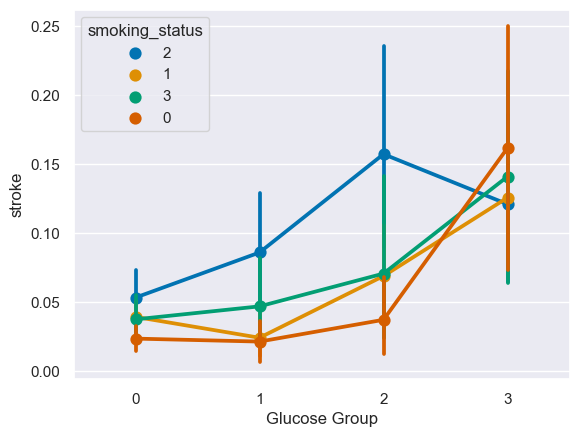

In [332]:
sns.pointplot(data=df, y="stroke",
x="Glucose Group",
hue="smoking_status")

We observe an intense rise in stroke incidence among non-smokers in groups 2 and 3. Additionally, an unexpected peak of stroke is noted in the glucose levels of group 2 for former smokers.

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

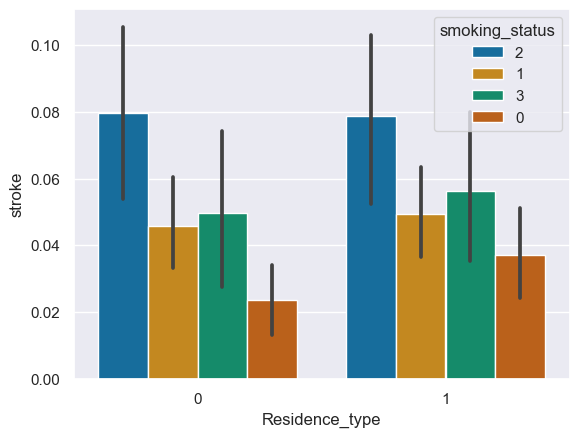

In [333]:
sns.barplot(data=df, y ="stroke", x = "Residence_type", hue= "smoking_status" )

The stroke patterns between urban and rural populations appear similar, with no significant conclusions. However, there is a slightly higher risk of stroke among non-smokers in urban areas.

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

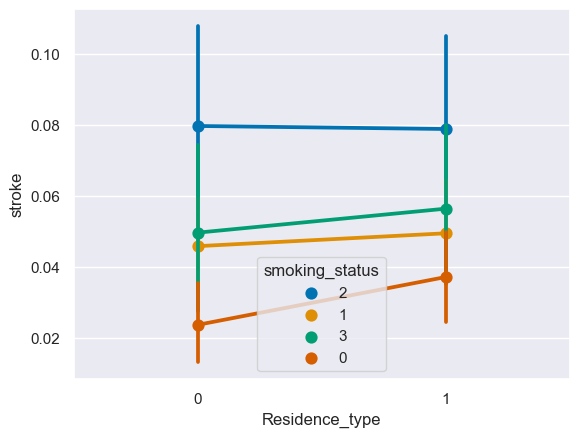

In [334]:
sns.pointplot(data=df, y="stroke",
x="Residence_type",
hue="smoking_status")

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

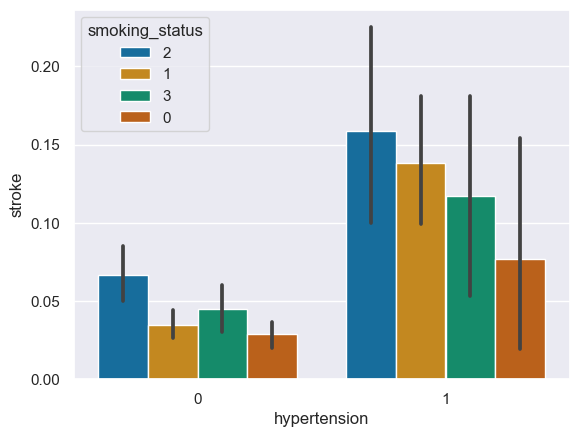

In [335]:
sns.barplot(data=df, y ="stroke", x = "hypertension", hue= "smoking_status" )

A significantly higher risk of stroke is observed in individuals with hypertension compared to those without. However, smoking status does not appear to significantly intensify the stroke risk associated with hypertension.

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

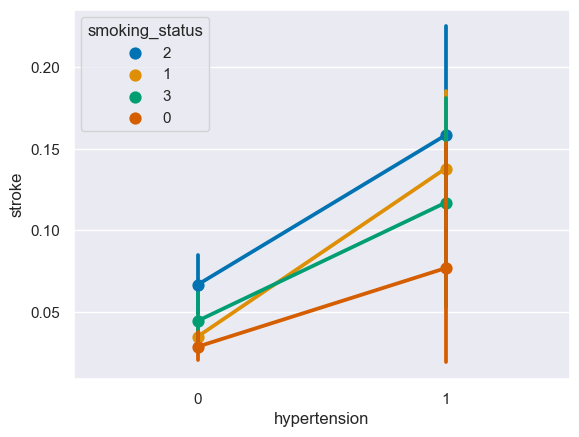

In [336]:
sns.pointplot(data = df, y = "stroke", x = "hypertension", hue = "smoking_status")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

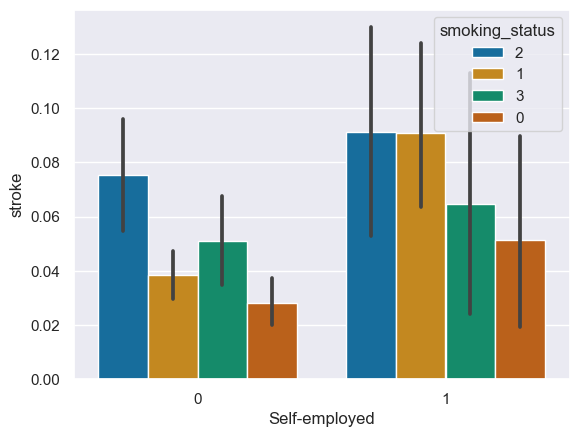

In [337]:
sns.barplot(data = df , x = "Self-employed", y = "stroke", hue= "smoking_status")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

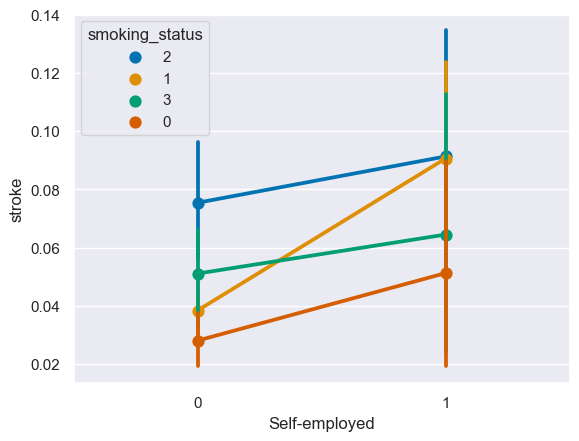

In [338]:
sns.pointplot(data = df , x = "Self-employed", y = "stroke", hue = "smoking_status")

A slightly higher risk of stroke is seen in self-employed individuals compared to others. This may be due to the age of self-employed individuals, so let’s examine this further:

<AxesSubplot:xlabel='Age Group', ylabel='Self-employed'>

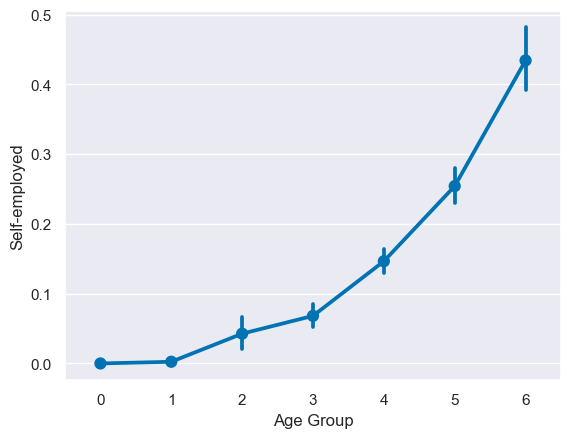

In [339]:
sns.pointplot(data = df , x = "Age Group", y="Self-employed")

Our hypothesis was correct! The higher risk of stroke in self-employed individuals is due to their older age, not their type of job.

#### Hypertension


<AxesSubplot:xlabel='hypertension,stroke'>

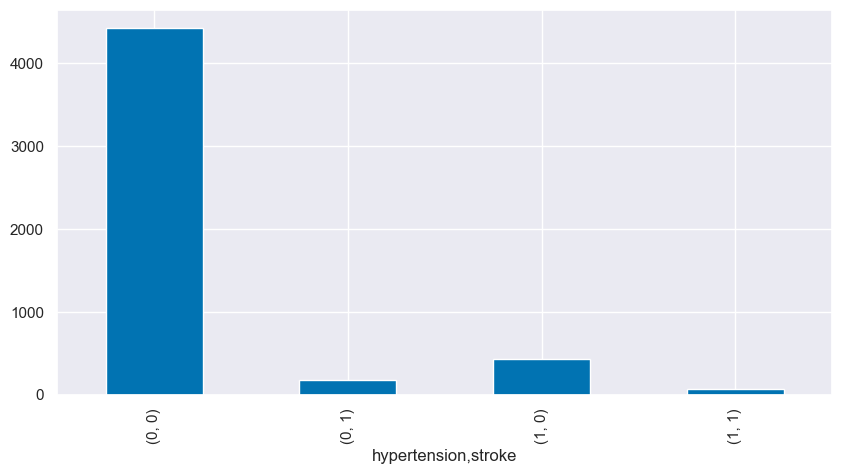

In [340]:
df_sm_gd = df.groupby("hypertension")["stroke"].value_counts()

df_sm_gd.plot(kind = 'bar', figsize=(10,5))

around 4500 results in our data were for people without stroke and hypertension, this is not good and we need more hypertension data for further investigations but lets see what we can find with what we have for now

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

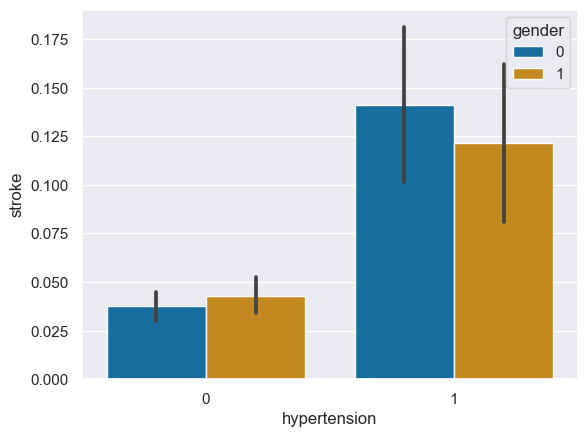

In [341]:
sns.barplot(data=df, y ="stroke", x = "hypertension", hue= "gender" )

Alongside an obvious higher stroke incidence in people who have hypertension, we also see that gender group 0 (women) may be more vulnerable to stroke when hypertension is present.

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

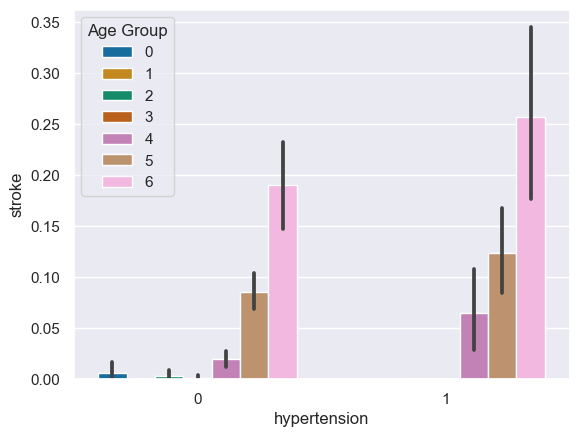

In [342]:
sns.barplot(data=df, y ="stroke", x = "hypertension", hue= "Age Group" )

Here we can see how the presence of hypertension may impact different age groups’ stroke risk. The risk of stroke rises in every group when hypertension is present. However, we observe a higher rise in age group 4 when hypertension is present. This indicates that when people are younger and the risk factor of age is not playing an effective role, other parameters like hypertension and smoking status (as we saw in the previous part) become more important and effective.

<AxesSubplot:xlabel='Age Group', ylabel='stroke'>

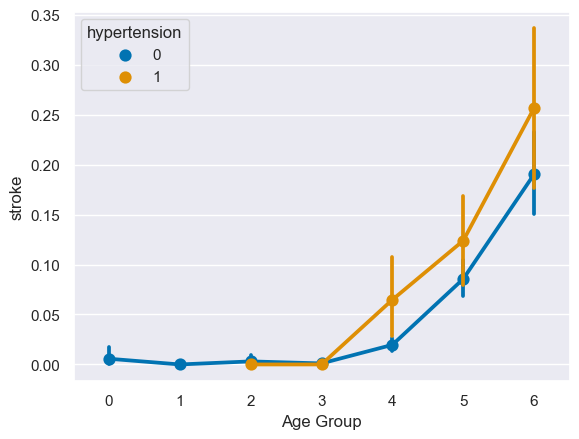

In [343]:
sns.pointplot(data = df, y = "stroke",
            x = "Age Group",
            hue = "hypertension")

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

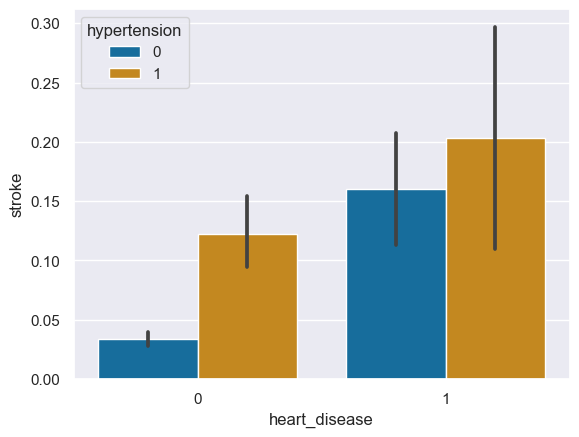

In [344]:
sns.barplot(data = df , x ="heart_disease" , y = "stroke", hue= "hypertension" )

In people with a healthy heart, the presence of hypertension significantly increases the possibility of stroke. However, in people with heart disease, although the presence of hypertension results in a higher stroke risk, the difference is not as pronounced as in the heart disease group 0.

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

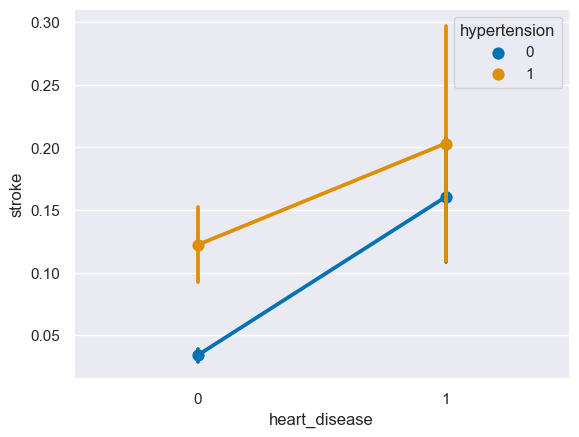

In [345]:
sns.pointplot(data=df, y="stroke",
x="heart_disease",
hue="hypertension")

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

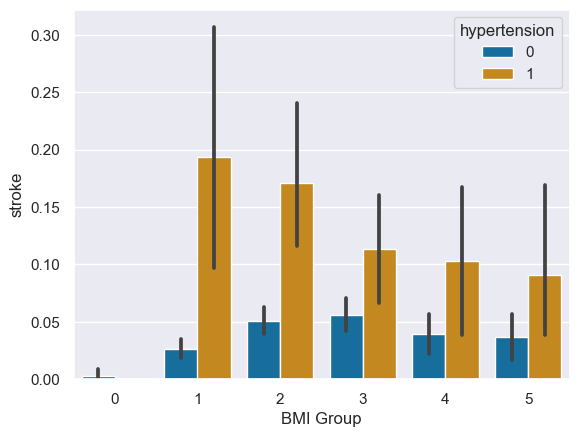

In [346]:
sns.barplot(data=df, y ="stroke", x = "BMI Group", hue= "hypertension" )

Surprisingly, this data shows a higher risk in BMI groups 1 and 2 in the presence of hypertension. This may be due to the low amount of data because it doesn’t make much sense.

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

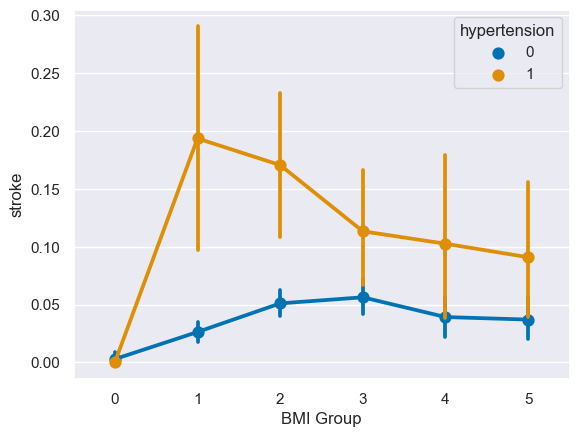

In [347]:
sns.pointplot(data=df, y="stroke",
x="BMI Group",
hue="hypertension")

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

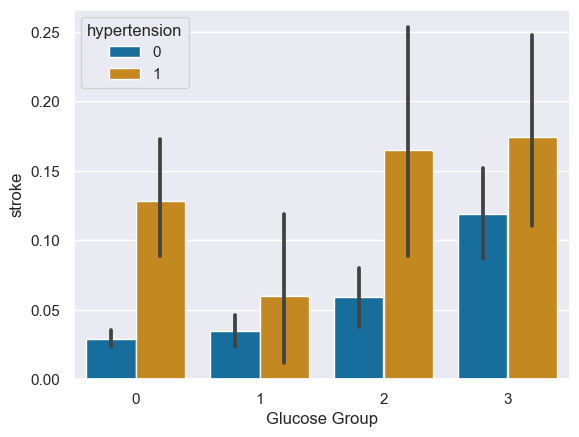

In [348]:
sns.barplot(data=df, y ="stroke", x = "Glucose Group", hue= "hypertension" )

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

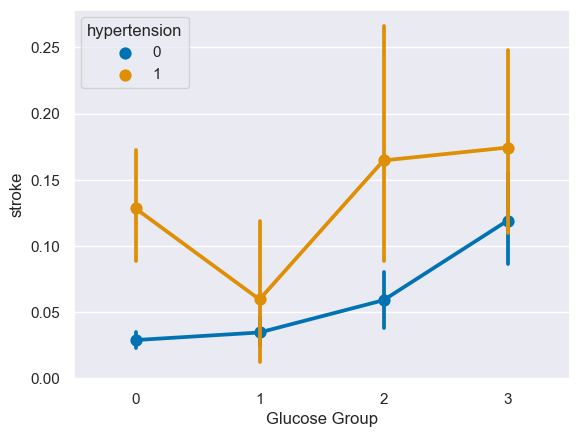

In [349]:
sns.pointplot(data=df, y="stroke",
x="Glucose Group",
hue="hypertension")

We again see a higher risk of stroke in people with hypertension. Not much relation can be observed between hypertension and the glucose group.

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

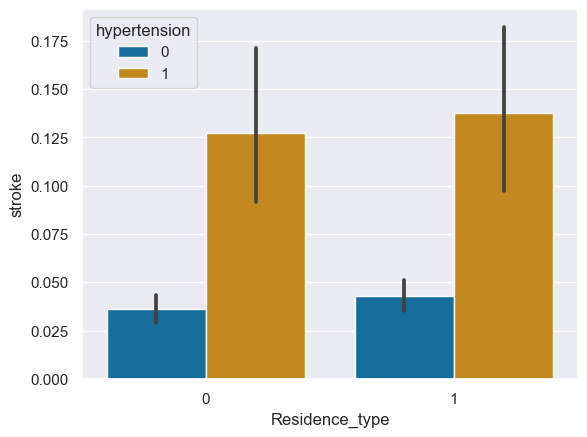

In [350]:
sns.barplot(data=df, y ="stroke", x = "Residence_type", hue= "hypertension" )

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

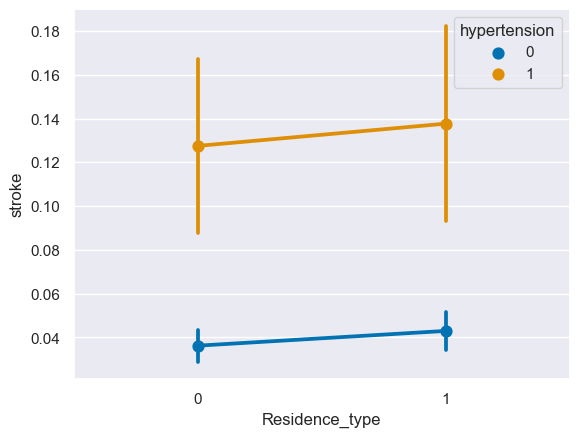

In [351]:
sns.pointplot(data=df, y="stroke",
x="Residence_type",
hue="hypertension")

No significant relation can be seen between hypertension and different residence types.



<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

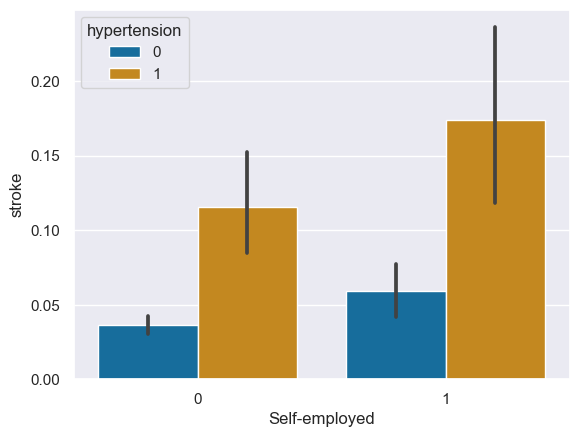

In [352]:
sns.barplot(data = df , x = "Self-employed", y = "stroke", hue= "hypertension")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

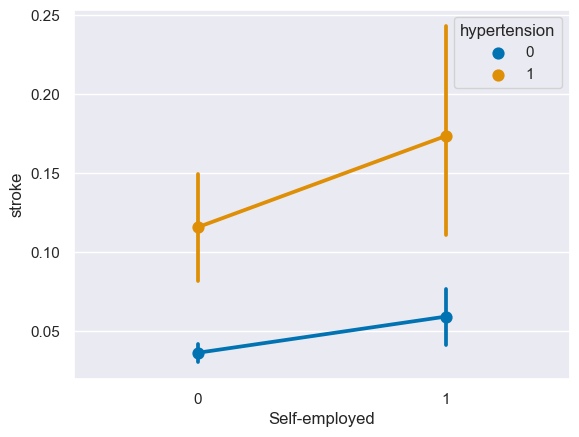

In [353]:
sns.pointplot(data = df , x = "Self-employed", y = "stroke", hue = "hypertension")

No significant relation can be seen between hypertension and self-employed versus non-self-employed individuals.

#### Age Group


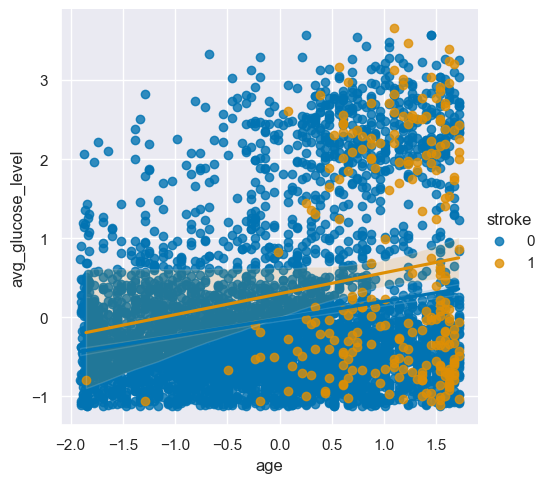

In [354]:
sns.lmplot(data = df, x="age", y = "avg_glucose_level",  hue = "stroke")

Here we can see the importance of age and glucose level as two factors in the presence of stroke. Most of the stroke data tends to be on the right side of the diagram, indicating higher ages.

<AxesSubplot:xlabel='Age Group,stroke'>

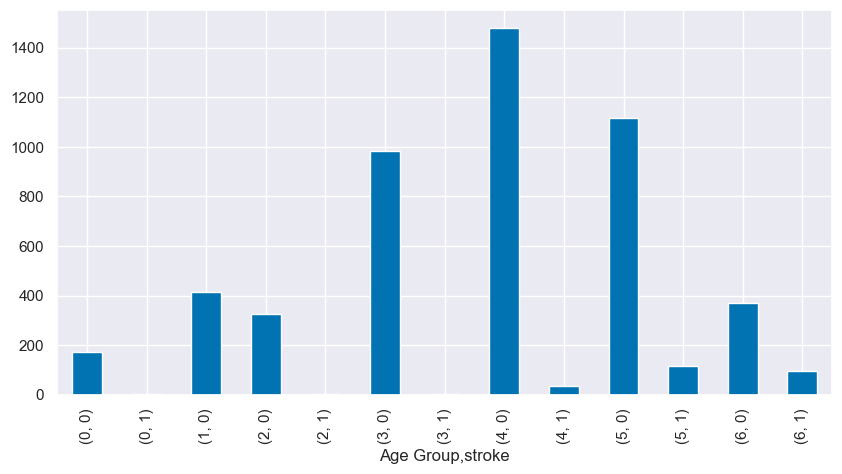

In [355]:
df_age_sr = df.groupby("Age Group")["stroke"].value_counts()

df_age_sr.plot(kind = "bar", figsize=(10, 5))

Let’s take a look at the top 3 age groups in our dataset: The majority, with more than 1400 reports, is for the non-stroke age group 4. The second and third most common data are for non-stroke age groups 5 and 3, respectively. We can see that some age columns do not contain values for stroke cases, indicating that more data is needed.

<AxesSubplot:xlabel='Age Group', ylabel='stroke'>

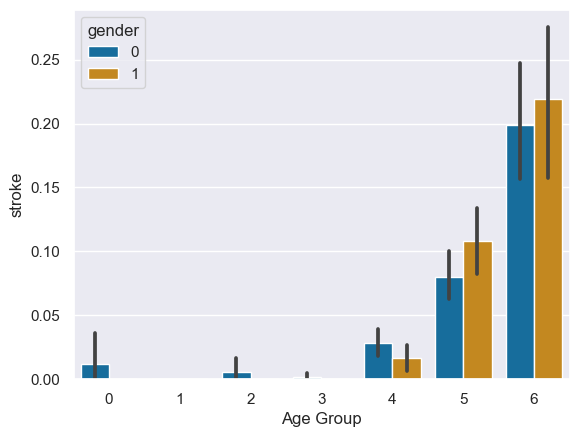

In [356]:
sns.barplot(data=df, y ="stroke", x = "Age Group", hue= "gender" )

We can see that there is not much stroke data for men in our dataset under age group 4. There is also almost no data for either gender in age group 1.

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

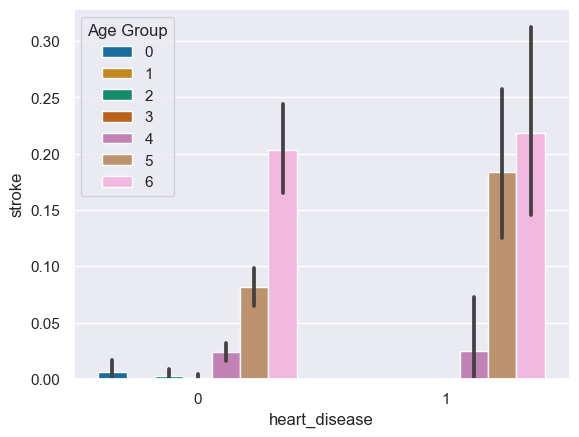

In [357]:
sns.barplot(data = df , x ="heart_disease" , y = "stroke", hue= "Age Group" )

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

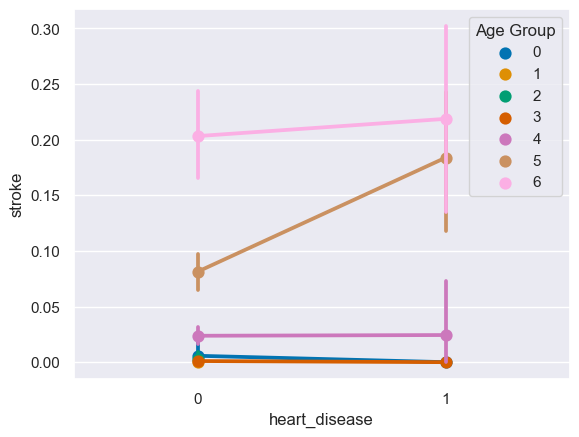

In [358]:
sns.pointplot(data=df, y="stroke",
x="heart_disease",
hue="Age Group")

A higher risk of stroke is observed in age group 5 when heart disease is present compared to when it is absent.

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

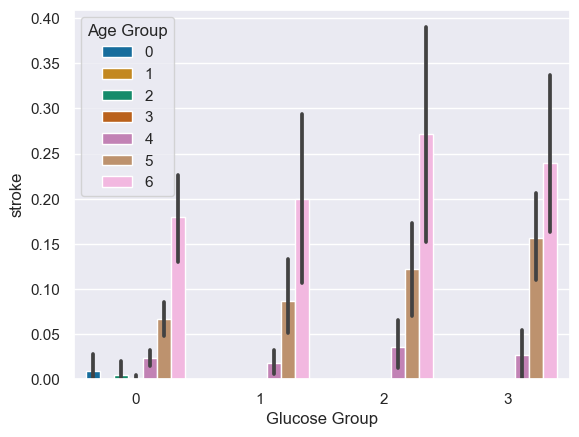

In [359]:
sns.barplot(data=df, y ="stroke", x = "Glucose Group", hue= "Age Group" )

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

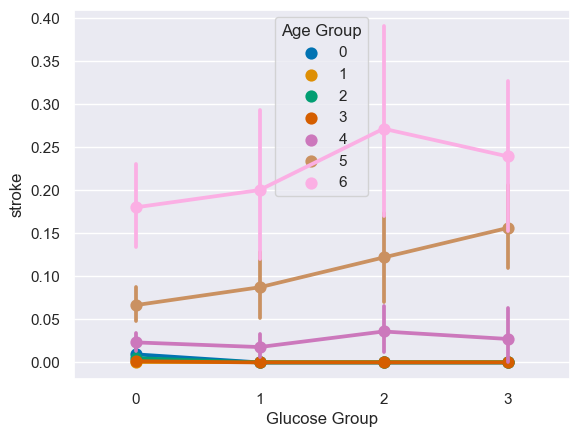

In [360]:
sns.pointplot(data=df, y="stroke",
x="Glucose Group",
hue="Age Group")

Not much relationship is observed between the two residence groups and the age groups.



<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

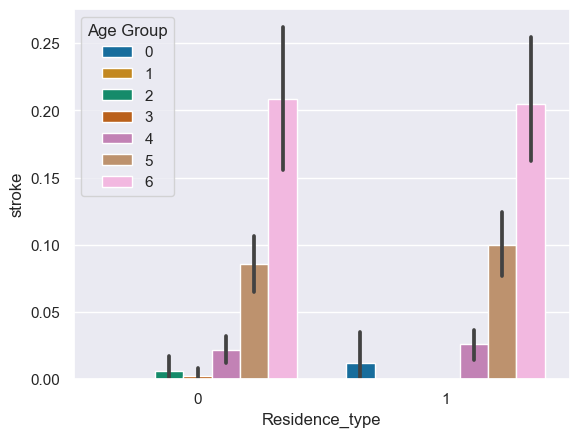

In [361]:
sns.barplot(data=df, y ="stroke", x = "Residence_type", hue= "Age Group" )

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

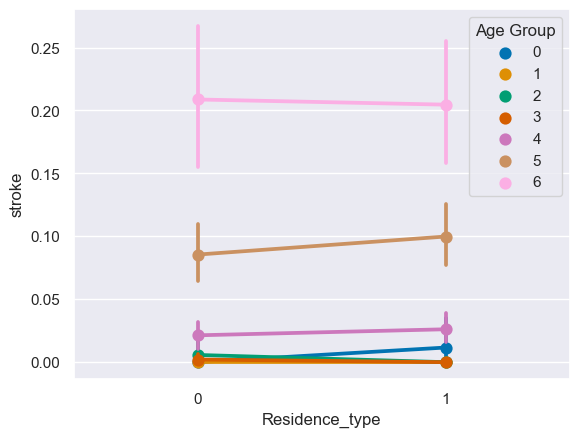

In [362]:
sns.pointplot(data=df, y="stroke",
x="Residence_type",
hue="Age Group")

not much difference is observed between two residence groups

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

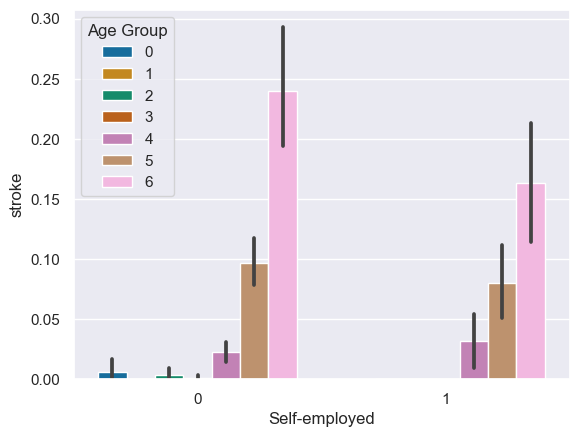

In [363]:
sns.barplot(data = df , x = "Self-employed", y = "stroke", hue= "Age Group")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

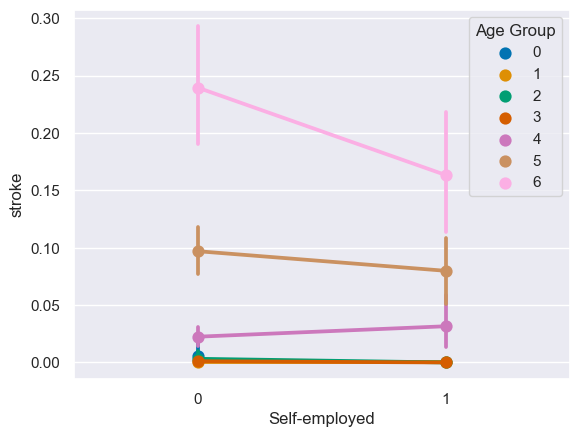

In [364]:
sns.pointplot(data = df , x = "Self-employed", y = "stroke", hue = "Age Group")

A significantly lower number of strokes is observed in self-employed individuals in age group 6 compared to those who are not self-employed.

#### Heart disease 

<AxesSubplot:xlabel='heart_disease,stroke'>

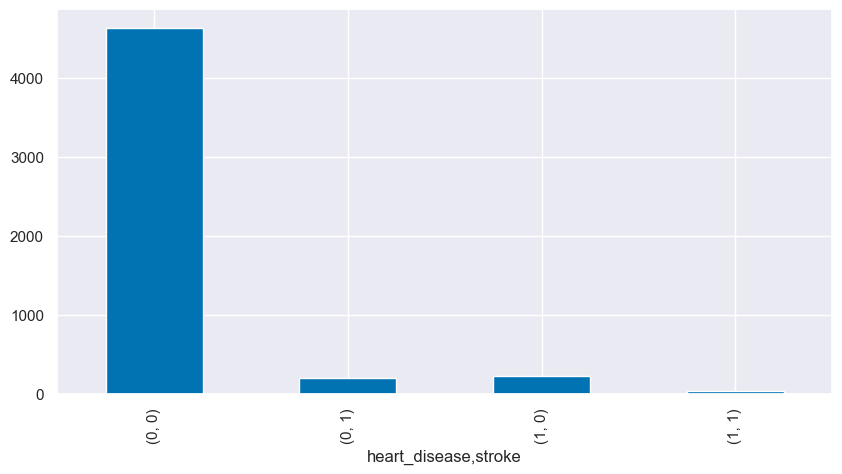

In [365]:
df_sm_gd = df.groupby("heart_disease")["stroke"].value_counts()

df_sm_gd.plot(kind = 'bar', figsize=(10,5))

just the same as hypertension, most of our data is from individuals without heart disease or stroke.

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

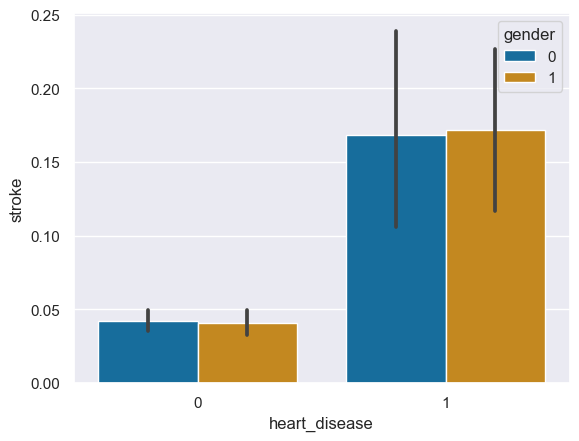

In [366]:
sns.barplot(data=df, y ="stroke", x = "heart_disease", hue= "gender" )

Stroke rates are similar between men and women in both heart disease and non-heart disease conditions.

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

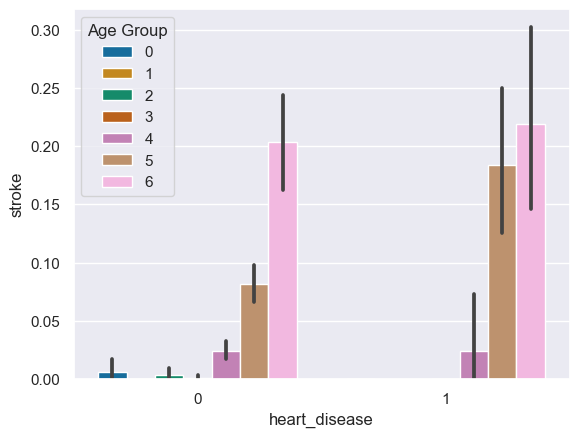

In [367]:
sns.barplot(data=df, y ="stroke", x = "heart_disease", hue= "Age Group" )

<AxesSubplot:xlabel='Age Group', ylabel='stroke'>

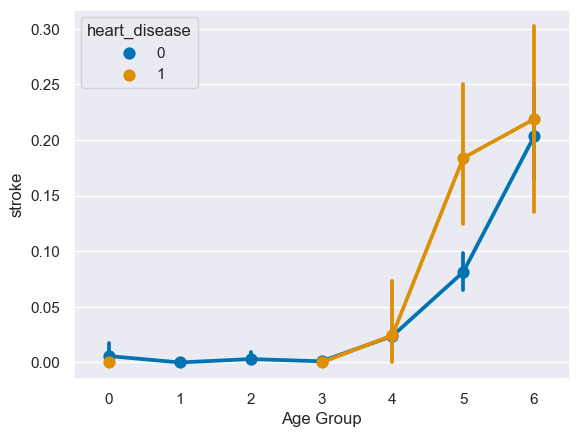

In [368]:
sns.pointplot(data = df, y = "stroke",
            x = "Age Group",
            hue = "heart_disease")

There's a significant increase in the likelihood of stroke in age group 5, with a smaller difference between heart disease and non-heart disease conditions.

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

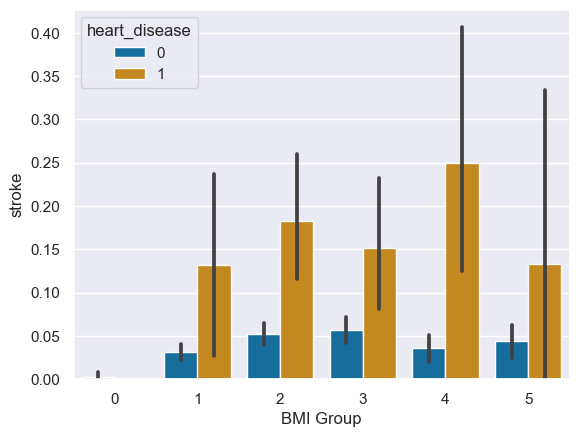

In [369]:
sns.barplot(data=df, y ="stroke", x = "BMI Group", hue= "heart_disease" )

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

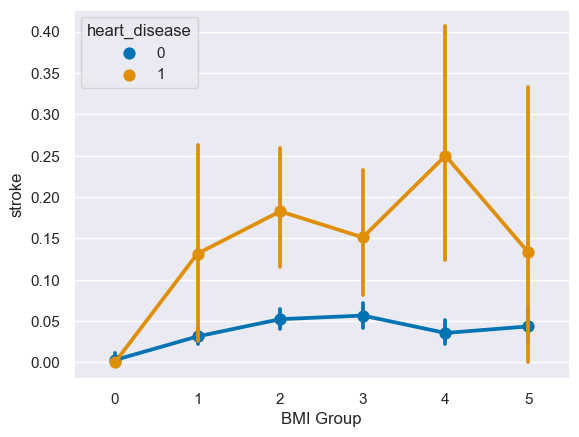

In [370]:
sns.pointplot(data=df, y="stroke",
x="BMI Group",
hue="heart_disease")

BMI groups show little variation in stroke risk for non-heart disease patients, except for BMI group 4, where heart disease patients have a higher risk.


<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

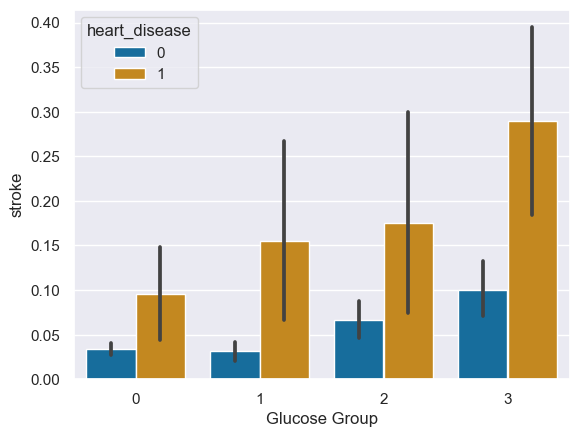

In [371]:
sns.barplot(data=df, y ="stroke", x = "Glucose Group", hue= "heart_disease" )

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

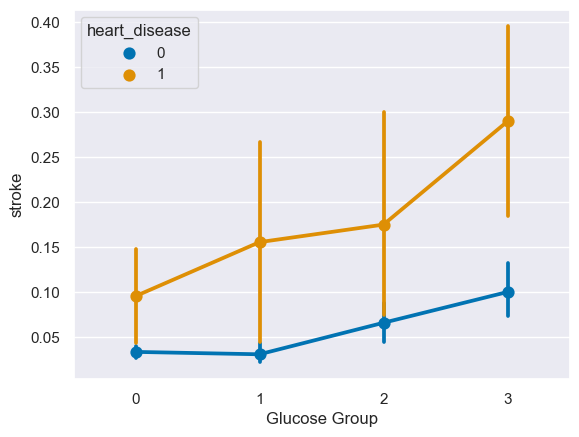

In [372]:
sns.pointplot(data=df, y="stroke",
x="Glucose Group",
hue="heart_disease")

Individuals with heart disease have a higher overall risk of stroke, which increases with higher glucose levels.


<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

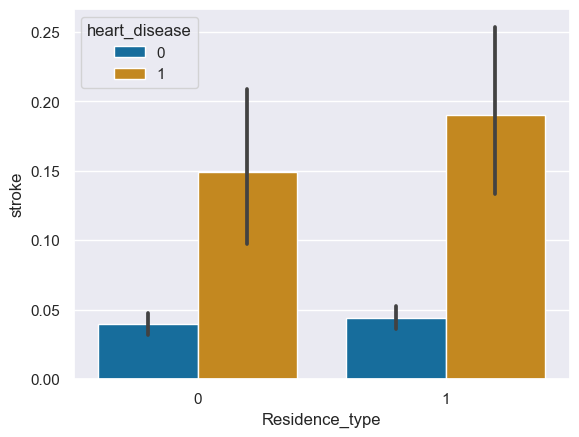

In [373]:
sns.barplot(data=df, y ="stroke", x = "Residence_type", hue= "heart_disease" )

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

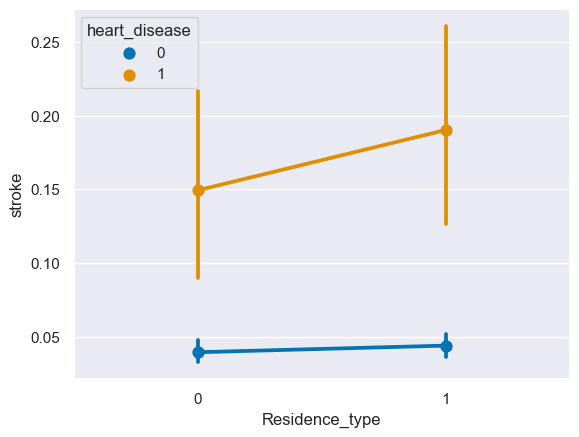

In [374]:
sns.pointplot(data=df, y="stroke",
x="Residence_type",
hue="heart_disease")

Stroke risk in non-heart disease patients is similar between urban and rural areas. However, heart disease patients in urban areas have a higher risk, possibly due to stressful, crowded living conditions and unhealthy air.


<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

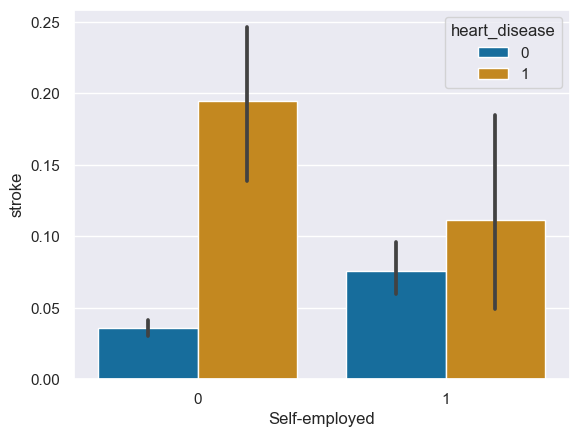

In [375]:
sns.barplot(data = df , x = "Self-employed", y = "stroke", hue= "heart_disease")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

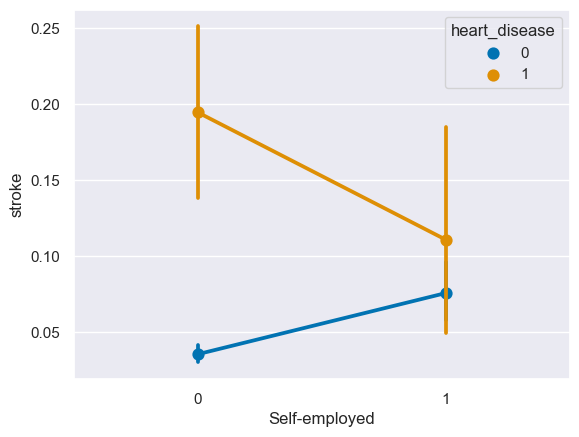

In [376]:
sns.pointplot(data = df , x = "Self-employed", y = "stroke", hue = "heart_disease")

Self-employed individuals with heart disease have a lower risk of stroke compared to non-self-employed individuals. Interestingly, the risk of stroke for non-heart disease patients is slightly higher in self-employed individuals.


#### Average glucose level

<AxesSubplot:xlabel='Glucose Group,stroke'>

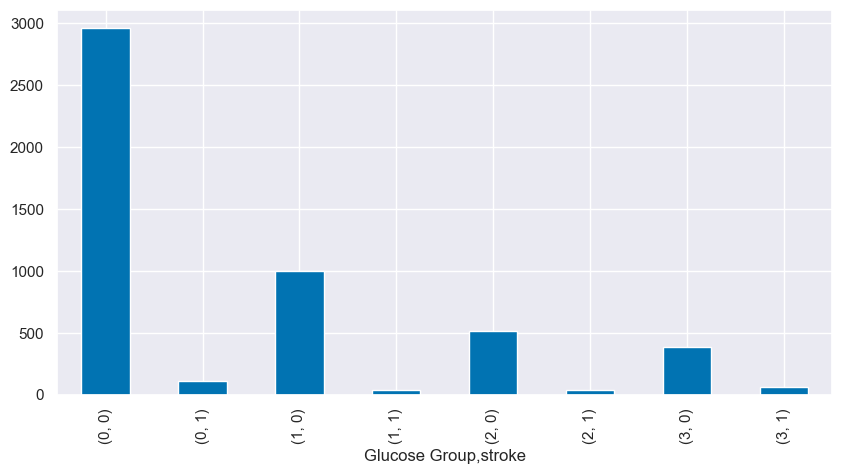

In [377]:
df_age_sr = df.groupby("Glucose Group")["stroke"].value_counts()

df_age_sr.plot(kind = "bar", figsize=(10, 5))

The top four groups of our data belong to the non-stroke data from glucose groups 0 to 3, respectively.

<AxesSubplot:xlabel='Glucose Group', ylabel='stroke'>

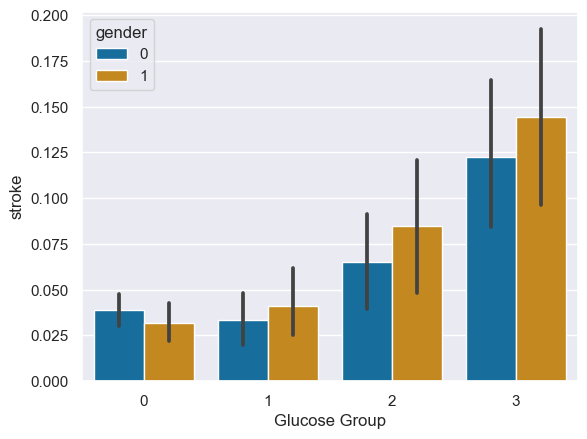

In [378]:
sns.barplot(data=df, y ="stroke", x = "Glucose Group", hue= "gender" )

Higher stroke levels are observed in men from glucose groups 1, 2, and 3. However, in group 0, women have a higher stroke presence than men.

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

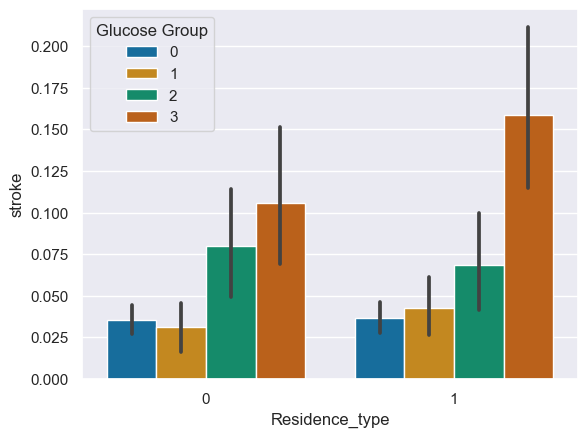

In [379]:
sns.barplot(data=df, y ="stroke", x = "Residence_type", hue= "Glucose Group" )

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

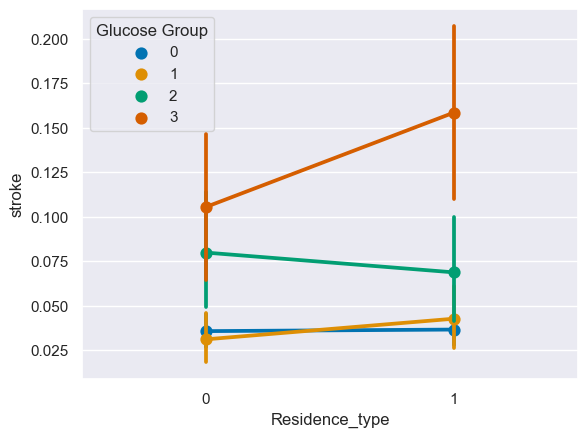

In [380]:
sns.pointplot(data=df, y="stroke",
x="Residence_type",
hue="Glucose Group")

Except for glucose group 3, which shows an increase in stroke for urban residence type conditions, other glucose groups exhibit minimal change between different residence types.

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

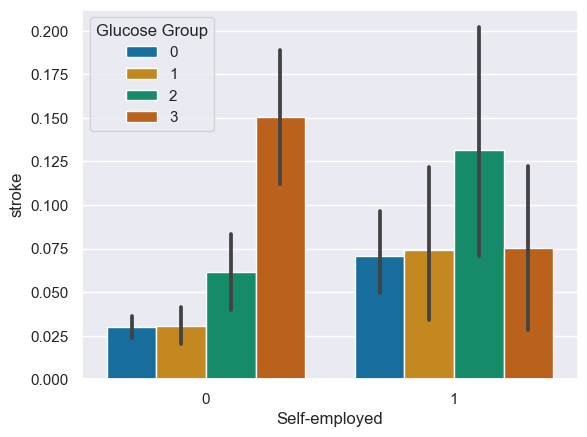

In [381]:
sns.barplot(data = df , x = "Self-employed", y = "stroke", hue= "Glucose Group")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

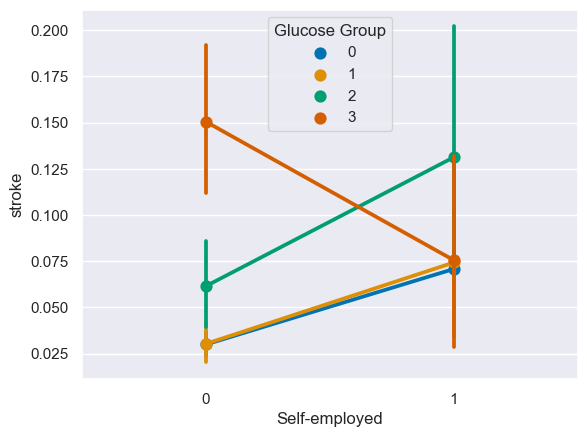

In [382]:
sns.pointplot(data = df , x = "Self-employed", y = "stroke", hue = "Glucose Group")

All glucose groups, except group 3, face an increase in stroke presence from non-self-employed to self-employed groups. Our data suggests that the presence of stroke surprisingly decreases in glucose group 3 for unknown reasons.



#### BMI

<AxesSubplot:xlabel='BMI Group,stroke'>

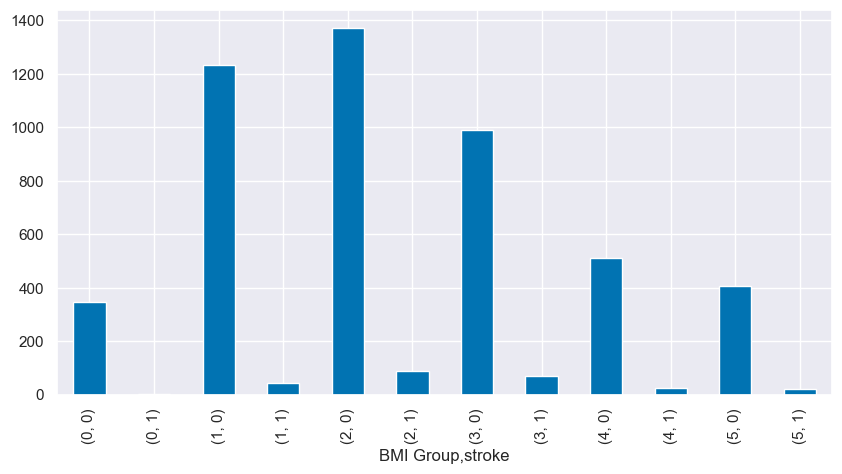

In [383]:
df_age_sr = df.groupby("BMI Group")["stroke"].value_counts()

df_age_sr.plot(kind = "bar", figsize=(10, 5))

Our three most common BMI groups are group 2 without stroke, group 1 without stroke, and group 3 without stroke, respectively.

<AxesSubplot:xlabel='BMI Group', ylabel='stroke'>

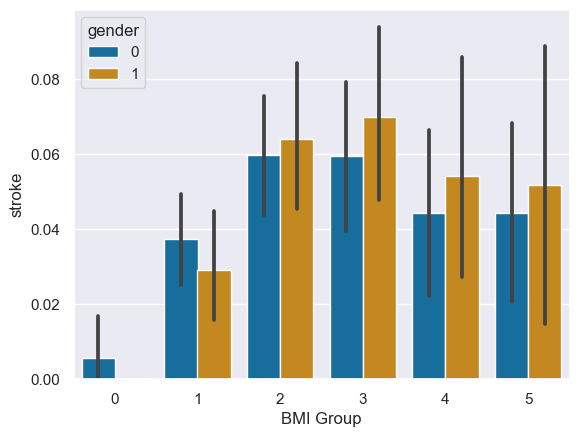

In [384]:
sns.barplot(data=df, y ="stroke", x = "BMI Group", hue= "gender" )

Insufficient stroke data is available for BMI group 0. The remaining groups exhibit a similar presence of stroke between genders, except for group 4, which has a higher stroke prevalence in men compared to women.

<AxesSubplot:xlabel='BMI Group', ylabel='Glucose Group'>

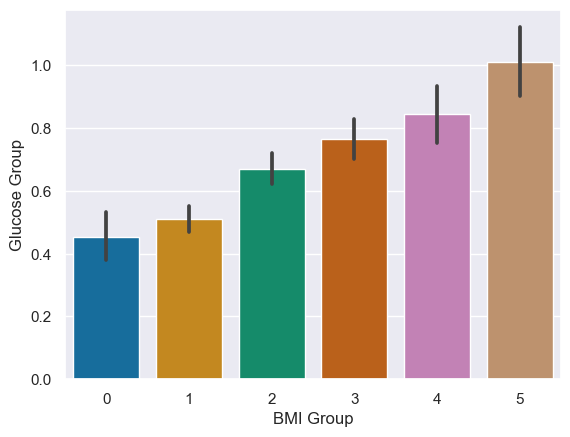

In [385]:
sns.barplot(data=df, y ="Glucose Group", x = "BMI Group")

<AxesSubplot:xlabel='BMI Group', ylabel='Glucose Group'>

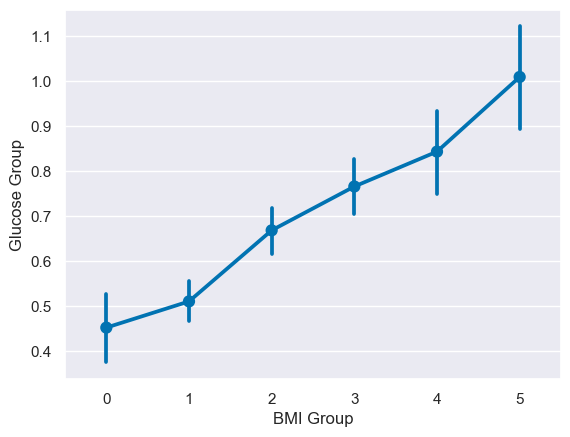

In [386]:
sns.pointplot(data=df, y="Glucose Group",
x="BMI Group")

Individuals with higher BMIs tend to have higher glucose groups.

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

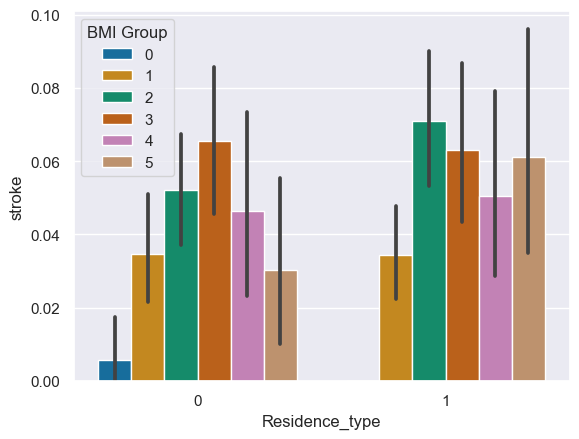

In [390]:
sns.barplot(data=df, y ="stroke", x = "Residence_type", hue= "BMI Group" )

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

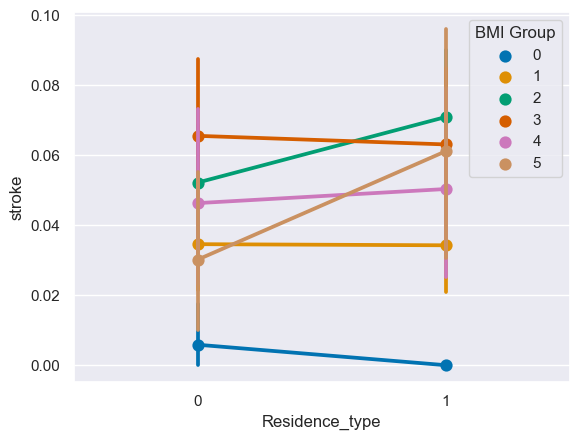

In [391]:
sns.pointplot(data=df, y="stroke",
x="Residence_type",
hue="BMI Group")

The presence of stroke is slightly higher in BMI group 5 for urban residents compared to rural residents.

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

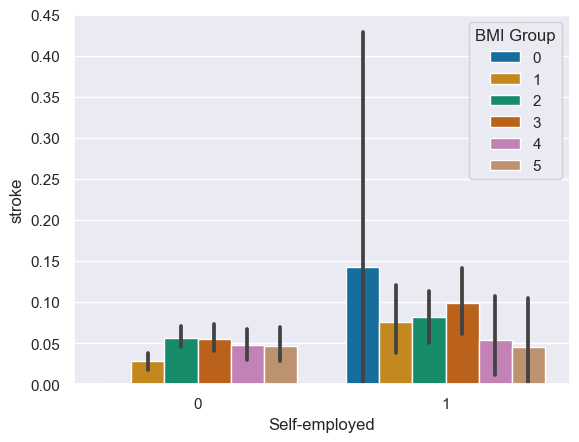

In [392]:
sns.barplot(data = df , x = "Self-employed", y = "stroke", hue= "BMI Group")

<AxesSubplot:xlabel='Self-employed', ylabel='stroke'>

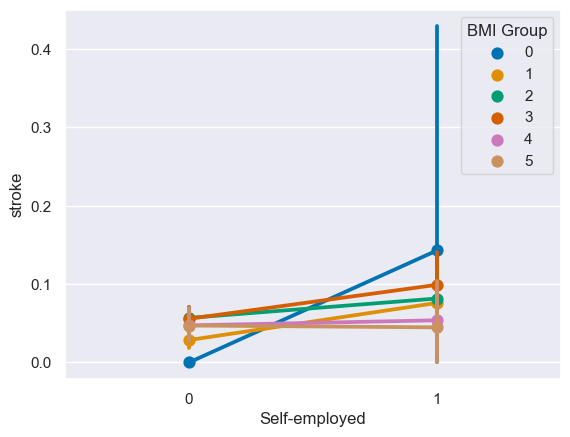

In [393]:
sns.pointplot(data = df , x = "Self-employed", y = "stroke", hue = "BMI Group")

In [394]:
df[df["BMI Group"] == 0.0].shape[0]

349

In [395]:
 df[(df["BMI Group"] == 0.0) & (df["Self-employed"] == 1)].shape[0]

7

Our data contains only 9 self-employed individuals with BMI Group 0, so due to insufficient data, we cannot draw any conclusions from the increasing behavior of group 0.

### other plots

lets take a look at our countniuis datas distribution

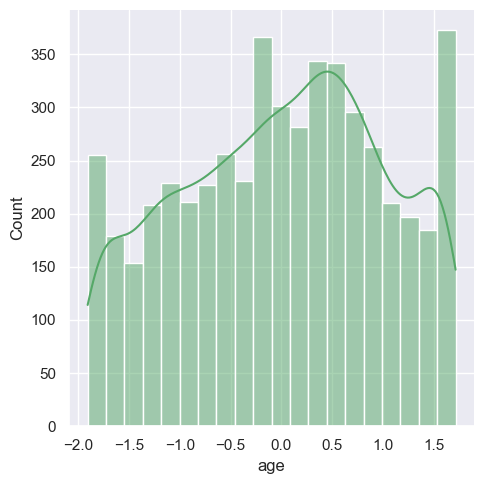

In [396]:
sns.set(color_codes = True)
sns.set_palette("colorblind")
sns.displot(df["age"], kde= True, color = "g")

A negative skew is observed in the age column (left-skewed distribution).
This suggests that there are more old individuals in your dataset compared to older individuals.

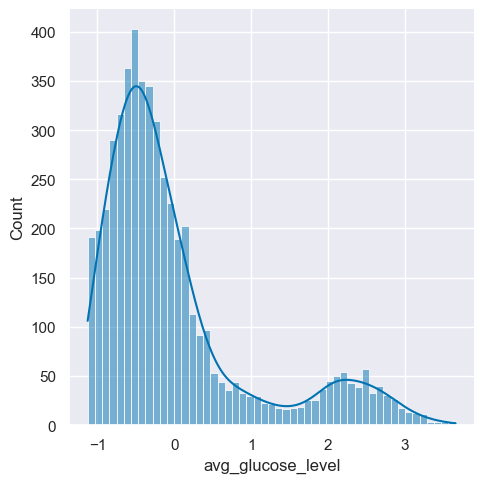

In [397]:
sns.displot(df["avg_glucose_level"], kde=True)

positive skew is observed in avg_glucose level column (right skewed distribution)
This indicates that there are more individuals with lower average glucose levels compared to higher levels.

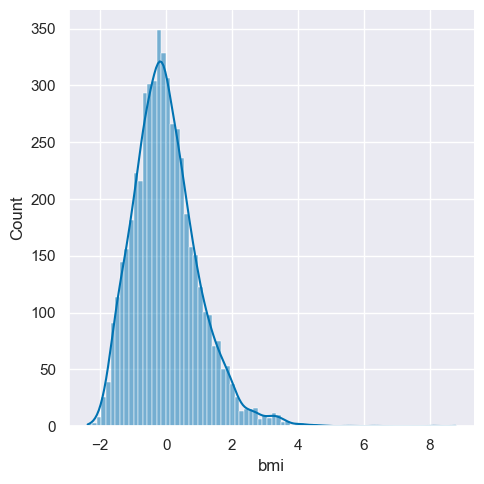

In [398]:
sns.displot(df["bmi"], kde=True)

positive skew is observed in bmi column (right skewed distribution)
This suggests that there are more individuals with lower BMIs compared to higher BMIs.


The primary goal of this notebook is to investigate the likelihood of stroke occurrence in the presence of various features. While we will primarily focused on these features,here we will also explore other parameters.

<AxesSubplot:xlabel='smoking_status,gender'>

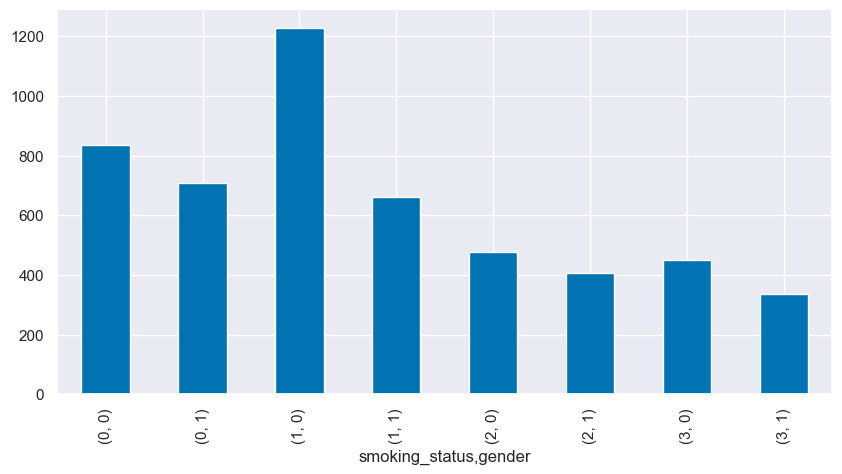

In [399]:
df_sm_gd = df.groupby("smoking_status")["gender"].value_counts()

df_sm_gd.plot(kind = 'bar', figsize=(10,5))


We can see that non-smoking women are much more prevalent than non-smoking men, but the other groups tend to be nearly equal between men and women (women are higher in all groups, but the difference in the non-smoking group is significant, and other groups are likely due to the imbalance of 60 to 40 percent in the presence of women and men in the dataset).

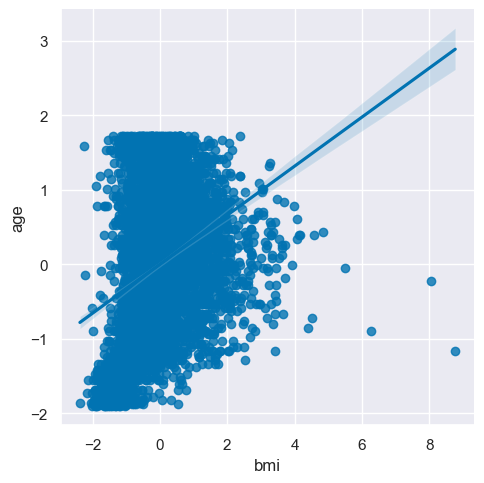

In [400]:
sns.lmplot(data = df, x="bmi", y = "age")

Here, we can see that older ages tend to have higher BMIs. The BMI in our data increases with age, which is unhealthy.

## Conclusions and Results

### smoking status results



1. **Data Overview**
   - Most of our data pertains to non-smokers who did not have a stroke.
   - The second most common category is individuals with unknown smoking status who did not have a stroke.

2. **Smoking and Stroke Risk**
   - Smoking might be a more dangerous risk factor for men compared to women. Higher risk of stroke is observed among men who smoke compared to women.
   - Almost all data for smokers and non-smokers comes from Groups 4, 5, and 6 (individuals above 36 years old).
   - Incidence of stroke in the fifth age group (56 to 75 years) is higher among smokers and former smokers compared to non-smokers.
   - Smoking shows its effects in later years, even for early smokers who quit.

3. **Unknown Smoking Status**
   - Group 0 represents unknown smoking status.Group 0 behaves similarly to Group 3, indicating many unknown statuses are probably smokers or have been smokers.
   - Significant increase in stroke risk after passing age Group 4, indicating age as the most important risk factor.
   - Higher stroke occurrence in smokers and former smokers compared to non-smokers in age Group 5.
   - Unexpected exponential increase in stroke risk in non-smokers and former smokers after age Group 5.

4. **Heart Disease and Stroke Risk**
   - Significantly higher risk of stroke in individuals with heart disease.
   - Higher stroke rate in people with heart disease who smoke compared to non-smokers and former smokers.
   - Smoking is a dangerous risk factor for stroke only when heart disease is present.

5. **Smoking and BMI**
   - No significant higher risk observed when smoking and high BMI are present together.

6. **Glucose Levels and Stroke Risk**
   - Significantly higher risk of stroke in individuals with high glucose levels.
   - No significant correlation between smoking status and glucose level as risk factors together.

7. **Additional Observations**
   - Intense rise in stroke incidence among non-smokers in groups 2 and 3.
   - Unexpected peak of stroke in glucose levels of group 2 for former smokers.
   - Similar stroke patterns between urban and rural populations, with a slightly higher risk among non-smokers in urban areas.
   - Higher risk of stroke in individuals with hypertension, but smoking status does not significantly intensify this risk.
   - Slightly higher risk of stroke in self-employed individuals due to their older age, not their type of job.


### Hypertension results


1. **Hypertension and Stroke Incidence**
   - Around 4500 results in our data were for people without stroke and hypertension. This is not ideal, and we need more hypertension data for further investigations.
   - Higher stroke incidence is observed in people with hypertension, especially in gender group 0 (women).

2. **Age Groups and Hypertension**
   - The presence of hypertension increases stroke risk across all age groups.
   - A higher rise in stroke risk is observed in age group 4 when hypertension is present, indicating that this group's individuals are more affected by hypertension and smoking status.

3. **Heart Disease and Hypertension**
   - In people with a healthy heart, hypertension significantly increases the possibility of stroke.
   - In people with heart disease, the presence of hypertension results in a higher stroke risk, but the difference is less pronounced compared to those without heart disease.

4. **BMI and Hypertension**
   - Higher stroke risk is observed in BMI groups 1 and 2 in the presence of hypertension, though this may be due to the low amount of data.

5. **Glucose Levels and Hypertension**
   - Higher stroke risk is observed in people with hypertension, but no significant relation is seen between hypertension and glucose levels.

6. **Residence Type and Employment Status**
   - No significant relation is observed between hypertension and different residence types.
   - No significant relation is observed between hypertension and self-employed versus non-self-employed individuals.


### Age Group results


1. **Age and Glucose Levels**
   - Age and glucose levels are important factors in the presence of stroke.
   - Most stroke data is on the right side of the diagram, indicating higher ages.

2. **Top Age Groups**
   - The majority of reports (over 1400) are for the non-stroke age group 4.
   - The second and third most common data are for non-stroke age groups 5 and 3, respectively.
   - Some age columns lack values for stroke cases, indicating a need for more data.

3. **Gender and Age**
   - Limited stroke data for men under age group 4.
   - Almost no data for either gender in age group 1.

4. **Heart Disease and Stroke Risk**
   - Higher risk of stroke in age group 5 when heart disease is present compared to when it is absent.

5. **Residence and Age Groups**
   - No significant relationship observed between residence groups and age groups.

6. **Employment Status**
   - Significantly lower number of strokes in self-employed individuals in age group 6 compared to those who are not self-employed.

### Heart disease


1. **Data Focus:** 
    - The majority of our data is from individuals without heart disease or stroke.
2. **Gender Equality:**
    - Stroke rates are comparable between men and women in both heart disease and non-heart disease conditions.
3. **Age-Related Risk:** 
    - A significant increase in stroke likelihood is observed in age group 5, with a less pronounced difference between heart disease and non-heart disease patients.
4. **BMI and Stroke:** 
    - BMI groups show minimal variation in stroke risk for non-heart disease patients, except for BMI group 4, where heart disease patients exhibit a higher risk.
5. **Heart Disease and Stroke:** 
    - Individuals with heart disease have a generally higher risk of stroke, which escalates with increasing glucose levels.
6. **Urban vs. Rural:** 
    - Stroke risk for non-heart disease patients is similar in urban and rural areas. However, heart disease patients in urban environments face a higher risk, potentially due to factors like stress, crowding, and poor air quality.
7. **Self-Employment and Stroke:** 
    - Self-employed individuals with heart disease have a lower stroke risk compared to non-self-employed individuals. Conversely, non-heart disease patients in self-employed roles show a slightly elevated stroke risk.


### Average glucose level results

1. **Non-Stroke Dominance:**
    - The majority of our data is from individuals without stroke, with glucose groups 0 to 3 representing the most common categories.
2. **Gender Disparity:**
    - Stroke rates are higher in men for glucose groups 1, 2, and 3. However, in group 0, women exhibit a higher stroke prevalence.
3. **Residence and Stroke:** 
     - Except for glucose group 3, which shows an increase in stroke for urban residence type conditions, other glucose groups exhibit minimal change between different residence types.
4. **Employment and Stroke:** 
    - All glucose groups, except group 3, face an increase in stroke presence from non-self-employed to self-employed groups. Our data suggests that the presence of stroke surprisingly decreases in glucose group 3 for unknown reasons.


### BMI results

1. **BMI Groups:**
    - The most common BMI groups are 2, 1, and 3, all without stroke.
2. **Data Limitations:**
    - Insufficient stroke data exists for BMI group 0.
3. **Gender Differences:** 
    - Stroke prevalence is similar between genders for most BMI groups, except group 4 where men have a higher risk.
4. **BMI and Glucose:**
    - Higher BMIs are associated with higher glucose groups.
5. **Urban vs. Rural:**
    - Stroke risk is slightly higher in BMI group 5 for urban residents.
6. **Self-Employment:**
    - Insufficient data prevents conclusions about stroke risk in self-employed individuals with BMI group 0.

### Other results

1. **Age and Glucose:**
    - Glucose level and glucose group increase with age.
2. **Age Distribution:** 
    - The age distribution is left-skewed, indicating a higher proportion of older individuals in the dataset.
3. **Glucose Level Distribution:** 
    - The average glucose level distribution is right-skewed, suggesting a higher prevalence of lower glucose levels.
4. **BMI Distribution:**
    - The BMI distribution is also right-skewed, indicating a higher prevalence of lower BMIs.
5. **Gender Differences:**
    - Non-smoking women outnumber non-smoking men significantly. While women have higher rates in all groups, the difference is most pronounced in non-smoking individuals.
6. **Age and BMI:**
    - Older individuals tend to have higher BMIs, indicating an unhealthy trend.